In [1]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import math
random.seed(42)
np.random.seed(42)
seed=42

import xgboost as xgb
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, cross_val_predict
from sklearn.preprocessing import LabelEncoder, RobustScaler, MinMaxScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, confusion_matrix

#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import SMOTE

In [432]:
df_Mayo_2023 = pd.read_excel("C:/Users/damartinezp/OneDrive - BAN100 S.A/Documentos/Proyectos Borrador/PD_C1/2024_modelo/datos_202305.xlsx")

In [94]:
df_Junio_2023 = pd.read_excel("C:/Users/damartinezp/OneDrive - BAN100 S.A/Documentos/Proyectos Borrador/PD_C1/2024_modelo/datos_202306.xlsx")

In [95]:
df_Julio_2023 = pd.read_excel("C:/Users/damartinezp/OneDrive - BAN100 S.A/Documentos/Proyectos Borrador/PD_C1/2024_modelo/datos_202307.xlsx")

In [96]:
df_Agosto_2023 = pd.read_excel("C:/Users/damartinezp/OneDrive - BAN100 S.A/Documentos/Proyectos Borrador/PD_C1/2024_modelo/datos_202308.xlsx")

In [97]:
df_Septiembre_2023 = pd.read_excel("C:/Users/damartinezp/OneDrive - BAN100 S.A/Documentos/Proyectos Borrador/PD_C1/2024_modelo/datos_202309.xlsx")

In [99]:
### Ejecutar solo los siguientes dos cuadros cuando se vaya a entrenar con el mes de mayo de 2023 y hacer validación con los meses de junio de 2023 a septiembre de 2023

In [3]:
cast_dias_sistema_2023=df_Mayo_2023[df_Mayo_2023['dias_sistema']>90]
cast_dias_sistema_1m_a_2023=df_Mayo_2023[df_Mayo_2023['mora_1_a']>120]
cast_dias_sistema_2m_a_2023=df_Mayo_2023[df_Mayo_2023['mora_2_a']>150]
df_filt_Mayo_2023=df_Mayo_2023[df_Mayo_2023['dias_sistema']<=90]
df_filt_Mayo_2023=df_filt_Mayo_2023[df_filt_Mayo_2023['mora_1_a']<=120]
df_filt_Mayo_2023=df_filt_Mayo_2023[df_filt_Mayo_2023['mora_2_a']<=150]
percentil_99 = np.percentile(df_filt_Mayo_2023['CUPO'], 99)
cupor_2023=df_filt_Mayo_2023[df_filt_Mayo_2023['CUPO'] > percentil_99]
df_filt_Mayo_2023['CUPO'] = df_filt_Mayo_2023['CUPO'].apply(lambda x: percentil_99 if x >= percentil_99 else x)
df_filt_Mayo_2023 = df_filt_Mayo_2023.reset_index(drop=True)

In [98]:
cast_dias_sistema_Junio_2023=df_Junio_2023[df_Junio_2023['dias_sistema']>90]
cast_dias_sistema_1m_a_Junio_2023=df_Junio_2023[df_Junio_2023['mora_1_a']>120]
cast_dias_sistema_2m_a_Junio_2023=df_Junio_2023[df_Junio_2023['mora_2_a']>150]
df_filt_Junio_2023=df_Junio_2023[df_Junio_2023['dias_sistema']<=90]
df_filt_Junio_2023=df_filt_Junio_2023[df_filt_Junio_2023['mora_1_a']<=120]
df_filt_Junio_2023=df_filt_Junio_2023[df_filt_Junio_2023['mora_2_a']<=150]
percentil_99 = np.percentile(df_filt_Junio_2023['CUPO'], 99)
cupor_Junio_2023=df_filt_Junio_2023[df_filt_Junio_2023['CUPO'] > percentil_99]
df_filt_Junio_2023['CUPO'] = df_filt_Junio_2023['CUPO'].apply(lambda x: percentil_99 if x >= percentil_99 else x)
df_filt_Junio_2023 = df_filt_Junio_2023.reset_index(drop=True)

                                        
cast_dias_sistema_Julio_2023=df_Julio_2023[df_Julio_2023['dias_sistema']>90]
cast_dias_sistema_1m_a_Julio_2023=df_Julio_2023[df_Julio_2023['mora_1_a']>120]
cast_dias_sistema_2m_a_Julio_2023=df_Julio_2023[df_Julio_2023['mora_2_a']>150]
df_filt_Julio_2023=df_Julio_2023[df_Julio_2023['dias_sistema']<=90]
df_filt_Julio_2023=df_filt_Julio_2023[df_filt_Julio_2023['mora_1_a']<=120]
df_filt_Julio_2023=df_filt_Julio_2023[df_filt_Julio_2023['mora_2_a']<=150]
percentil_99 = np.percentile(df_filt_Julio_2023['CUPO'], 99)
cupor_Julio_2023=df_filt_Julio_2023[df_filt_Julio_2023['CUPO'] > percentil_99]
df_filt_Julio_2023['CUPO'] = df_filt_Julio_2023['CUPO'].apply(lambda x: percentil_99 if x >= percentil_99 else x)
df_filt_Julio_2023 = df_filt_Julio_2023.reset_index(drop=True)


cast_dias_sistema_Agosto_2023=df_Agosto_2023[df_Agosto_2023['dias_sistema']>90]
cast_dias_sistema_1m_a_Agosto_2023=df_Agosto_2023[df_Agosto_2023['mora_1_a']>120]
cast_dias_sistema_2m_a_Agosto_2023=df_Agosto_2023[df_Agosto_2023['mora_2_a']>150]
df_filt_Agosto_2023=df_Agosto_2023[df_Agosto_2023['dias_sistema']<=90]
df_filt_Agosto_2023=df_filt_Agosto_2023[df_filt_Agosto_2023['mora_1_a']<=120]
df_filt_Agosto_2023=df_filt_Agosto_2023[df_filt_Agosto_2023['mora_2_a']<=150]
percentil_99 = np.percentile(df_filt_Agosto_2023['CUPO'], 99)
cupor_Agosto_2023=df_filt_Agosto_2023[df_filt_Agosto_2023['CUPO'] > percentil_99]
df_filt_Agosto_2023['CUPO'] = df_filt_Agosto_2023['CUPO'].apply(lambda x: percentil_99 if x >= percentil_99 else x)
df_filt_Agosto_2023 = df_filt_Agosto_2023.reset_index(drop=True)

cast_dias_sistema_Septiembre_2023=df_Septiembre_2023[df_Septiembre_2023['dias_sistema']>90]
cast_dias_sistema_1m_a_Septiembre_2023=df_Septiembre_2023[df_Septiembre_2023['mora_1_a']>120]
cast_dias_sistema_2m_a_Septiembre_2023=df_Septiembre_2023[df_Septiembre_2023['mora_2_a']>150]
df_filt_Septiembre_2023=df_Septiembre_2023[df_Septiembre_2023['dias_sistema']<=90]
df_filt_Septiembre_2023=df_filt_Septiembre_2023[df_filt_Septiembre_2023['mora_1_a']<=120]
df_filt_Septiembre_2023=df_filt_Septiembre_2023[df_filt_Septiembre_2023['mora_2_a']<=150]
percentil_99 = np.percentile(df_filt_Septiembre_2023['CUPO'], 99)
cupor_Septiembre_2023=df_filt_Septiembre_2023[df_filt_Septiembre_2023['CUPO'] > percentil_99]
df_filt_Septiembre_2023['CUPO'] = df_filt_Septiembre_2023['CUPO'].apply(lambda x: percentil_99 if x >= percentil_99 else x)
df_filt_Septiembre_2023 = df_filt_Septiembre_2023.reset_index(drop=True)

In [100]:
### Ejecutar el siguiente código cuando se vaya a entrenar con un año, junio 2022 a mayo de 2023 y validación con junio de 2023 a septiembre de 2023

In [445]:
print(df_filt_Mayo_2023["marca_default"].value_counts())
print(df_filt_Mayo_2023["marca_default"].value_counts()[1]/len(df_filt_Mayo_2023))
print(1-df_filt_Mayo_2023["marca_default"].value_counts()[1]/len(df_filt_Mayo_2023))
print(len(df_filt_Mayo_2023))

marca_default
0    101528
1     47824
Name: count, dtype: int64
0.32020997375328086
0.6797900262467191
149352


##### Correr esta linea solo cuando vayamos a entrenar con Enero

In [6]:
df=pd.concat([df_filt_Mayo_2023], axis=0)

In [447]:
df=df.reset_index(drop=True)

#### Marca default

In [448]:
print(df["marca_default"].value_counts())
print(df["marca_default"].value_counts()[1]/len(df))
print(1-df["marca_default"].value_counts()[1]/len(df))
print(len(df))

marca_default
0    1342865
1     424826
Name: count, dtype: int64
0.24032820215750378
0.7596717978424963
1767691


In [449]:
registros_completos = df.dropna()
registros_faltantes = df[df.isnull().any(axis=1)]
print("Cantidad de datos con registros faltantes en alguna de las variables:", len(registros_faltantes))
print("\n\n Cantidad de datos con registros completos:", len(registros_completos))

Cantidad de datos con registros faltantes en alguna de las variables: 0


 Cantidad de datos con registros completos: 1767691


In [450]:
registros_faltantes

,IDENTIFICACION,NUMERO_TARJETA,fecha_corte,dias_sistema,CUPO,mora_1_a,mora_2_a,P_MP6,TP_pp,PR_1_D,PR_O_D,C_AuM,marca_default


In [451]:
#df['mora_1_a'].fillna(0, inplace=True)
#df['mora_2_a'].fillna(0, inplace=True)

In [452]:
registros_completos = df.dropna()
registros_faltantes = df[df.isnull().any(axis=1)]
print("Cantidad de datos con registros faltantes en alguna de las variables:", len(registros_faltantes))
print("\n\n Cantidad de datos con registros completos:", len(registros_completos))

Cantidad de datos con registros faltantes en alguna de las variables: 0


 Cantidad de datos con registros completos: 1767691


In [453]:
df=registros_completos

In [454]:
df[df.isnull().any(axis=1)]

,IDENTIFICACION,NUMERO_TARJETA,fecha_corte,dias_sistema,CUPO,mora_1_a,mora_2_a,P_MP6,TP_pp,PR_1_D,PR_O_D,C_AuM,marca_default


### Aquí se define el threshold del modelo

In [455]:
#Ajustar para que el modelo clasifique. 
proba=0.5

### Entrenamiento Mayo 2023

In [456]:
variables3=['dias_sistema','P_MP6','TP_pp','CUPO','mora_1_a','PR_O_D','mora_2_a','C_AuM','PR_1_D','marca_default']

In [457]:
#OPCIÓN DE SELECCIÓN DE VARIABLES DE ACUERDO AL STEPWISE
df1=df[variables3]
df1.describe()

#Pruebas VIF "PR_AGRUP" , "P_Dis"  ,"FRANJA_0_D" ,"P_Dis" "FRANJA_31_90_D",  Cuanti 
cuantis=["dias_sistema", "CUPO", "mora_1_a", "mora_2_a"]
cualis=["marca_default", "P_MP6", "TP_pp", "PR_O_D","C_AuM", "PR_1_D"]

scaler = MinMaxScaler()
df1[cuantis] = scaler.fit_transform(df1[cuantis])

#Guarda el escalador de las variables cuantitativas
joblib.dump(scaler, 'escalador_minmax_modelo.pkl') 

for i in cualis:
    labelencoder = LabelEncoder()
    df1.loc[:, i] = labelencoder.fit_transform(df1[i])

train_size=0.8
train, test = model_selection.train_test_split(df1,train_size=int(train_size*len(df1)), stratify=df1["marca_default"], random_state=seed)

C:\Users\damartinezp\AppData\Local\Temp\ipykernel_172\170707402.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[cuantis] = scaler.fit_transform(df1[cuantis])


In [458]:
# Mostramos los resultados
print("Mínimos de los datos escalados:", scaler.data_min_)
print("Máximos de los datos escalados:", scaler.data_max_)
print("Escala de los datos escalados:", scaler.scale_)
print("Mínimos deseados:", scaler.min_)

Mínimos de los datos escalados: [    0. 50000.     0.     0.]
Máximos de los datos escalados: [9.0e+01 6.6e+06 1.2e+02 1.5e+02]
Escala de los datos escalados: [1.11111111e-02 1.52671756e-07 8.33333333e-03 6.66666667e-03]
Mínimos deseados: [ 0.         -0.00763359  0.          0.        ]


In [459]:
#Métricas de evaluación:
def calMetrics(cm):
  #Se toman de esta forma los valores para que la clase positiva sea {1}
  TN = cm[0,0]
  TP = cm[1,1]
  FN = cm[1,0]
  FP = cm[0,1]
  acc = round(((TP + TN) / (TP + TN + FP + FN))*100,2)          #Accuracy
  err = round((1 - ((TP + TN) / (TP + TN + FP + FN)))*100,2)    #Tasa de error 
  se = round((TP / (TP + FN))*100,2)                            #Sensibilidad o Recall
  sp = round((TN / ( TN + FP))*100,2)                          #Especificidad 
  prec = round((TP / (TP + FP))*100,2)                          #Precision
  FPR = round((FP / (FP + TN))*100,2)                           #Tasa de falsos positivos
  return acc,err,se,sp,prec,FPR

#Métricas de evaluación con librerias 
def calMetrics2(y_val_fold, y_pred_labels):
    accuracy = accuracy_score(y_val_fold, y_pred_labels)
    precision = precision_score(y_val_fold, y_pred_labels)
    recall = recall_score(y_val_fold, y_pred_labels)
    f1 = round(f1_score(y_val_fold, y_pred_labels)*100,2)
    roc_auc = round(roc_auc_score(y_val_fold, y_pred_labels)*100,2)
    conf_matrix = confusion_matrix(y_val_fold, y_pred_labels)
    return accuracy,precision,recall,f1,roc_auc

##### Tasa de aprendizaje 0.1 y profundidad 3

In [460]:
import os

# Asegurarse de que el directorio exista
save_dir = 'saved_model0/XGBoost01_3/'
os.makedirs(save_dir, exist_ok=True)  # Crea el directorio si no existe

params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "eta": 0.1,
    "max_depth":3,
    "subsample":0.8,
    "colsample_bytree":0.8,
    "seed":42
}

num_folds=10
kfold=StratifiedKFold(n_splits=num_folds, shuffle=False)

np.random.seed(seed)
indices = np.random.permutation(len(train))

matrixXGBoost=pd.DataFrame()
fold_no=1
for train_idx, val_idx in kfold.split(train, train["marca_default"]):
    
    train_indices = indices[train_idx]
    val_indices = indices[val_idx]
    train_matrix=train.drop(["marca_default"], axis=1)

    X_train, X_val = train_matrix.iloc[train_indices], train_matrix.iloc[val_indices]
    y_train_fold, y_val_fold = train["marca_default"].iloc[train_indices], train["marca_default"].iloc[val_indices]
    
    dtrain= xgb.DMatrix(X_train, label=y_train_fold)
    dval= xgb.DMatrix(X_val, label=y_val_fold)
    model=xgb.train(params, dtrain, num_boost_round=100)
    
    y_pred_proba=model.predict(dval)
    y_pred_labels= np.round(y_pred_proba>=0.5).astype(int)
    
    cm=confusion_matrix(y_val_fold, y_pred_labels)
    
    acc, err, se, sp, prec, FPR =calMetrics(cm)
    accuracy, precision, recall, f1, roc_auc=calMetrics2(y_val_fold, y_pred_labels)
    
    matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc
    }

    matrixXGBoost = pd.concat([matrixXGBoost, pd.DataFrame([matrix])], ignore_index=True)
    
    model.save_model(f'saved_model0/XGBoost01_3/{fold_no}.model')
    
    fold_no +=1

print(matrixXGBoost)

matrixXGBoost.describe().loc['mean']

C:\Users\damartinezp\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:160: UserWarning: [13:02:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
C:\Users\damartinezp\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:160: UserWarning: [13:03:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
C:\Users\damartinezp\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:160: UserWarning: [13:03:

     Acc    Err     Re     Sp    Pre   FPR     F1  ROC_AUC
0  79.84  20.16  38.99  92.89  63.66  7.11  48.36    65.94
1  79.75  20.25  38.30  92.77  62.45  7.23  47.48    65.53
2  79.89  20.11  39.75  92.70  63.50  7.30  48.89    66.23
3  80.11  19.89  39.36  92.96  63.83  7.04  48.69    66.16
4  80.12  19.88  39.34  92.97  63.80  7.03  48.67    66.15
5  79.86  20.14  38.63  92.95  63.50  7.05  48.04    65.79
6  80.15  19.85  39.30  92.96  63.63  7.04  48.59    66.13
7  79.92  20.08  40.06  92.54  62.96  7.46  48.97    66.30
8  79.81  20.19  39.47  92.67  63.18  7.33  48.59    66.07
9  79.93  20.07  38.58  92.90  63.06  7.10  47.87    65.74


C:\Users\damartinezp\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:160: UserWarning: [13:03:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


Acc        79.938
Err        20.062
Re         39.178
Sp         92.831
Pre        63.357
FPR         7.169
F1         48.415
ROC_AUC    66.004
Name: mean, dtype: float64

##### Tasa de aprendizaje 0.1 y profundidad 5

In [461]:
import os

# Asegurarse de que el directorio exista
save_dir = 'saved_model0/XGBoost01_5/'
os.makedirs(save_dir, exist_ok=True)  # Crea el directorio si no existe
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "eta": 0.1,
    "max_depth":5,
    "subsample":0.8,
    "colsample_bytree":0.8,
    "seed":42
}

num_folds=10
kfold=StratifiedKFold(n_splits=num_folds, shuffle=False)

np.random.seed(seed)
indices = np.random.permutation(len(train))

matrixXGBoost=pd.DataFrame()
fold_no=1
for train_idx, val_idx in kfold.split(train, train["marca_default"]):
    
    train_indices = indices[train_idx]
    val_indices = indices[val_idx]
    train_matrix=train.drop(["marca_default"], axis=1)

    X_train, X_val = train_matrix.iloc[train_indices], train_matrix.iloc[val_indices]
    y_train_fold, y_val_fold = train["marca_default"].iloc[train_indices], train["marca_default"].iloc[val_indices]
    
    dtrain= xgb.DMatrix(X_train, label=y_train_fold)
    dval= xgb.DMatrix(X_val, label=y_val_fold)
    model=xgb.train(params, dtrain, num_boost_round=100)
    
    y_pred_proba=model.predict(dval)
    y_pred_labels= np.round(y_pred_proba>=0.5).astype(int)
    
    cm=confusion_matrix(y_val_fold, y_pred_labels)
    
    acc, err, se, sp, prec, FPR =calMetrics(cm)
    accuracy, precision, recall, f1, roc_auc=calMetrics2(y_val_fold, y_pred_labels)
    
    matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc
    }

    matrixXGBoost = pd.concat([matrixXGBoost, pd.DataFrame([matrix])], ignore_index=True)
    
    model.save_model(f'saved_model0/XGBoost01_5/{fold_no}.model')
    
    fold_no +=1

print(matrixXGBoost)

matrixXGBoost.describe().loc['mean']

C:\Users\damartinezp\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:160: UserWarning: [13:04:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
C:\Users\damartinezp\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:160: UserWarning: [13:04:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
C:\Users\damartinezp\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:160: UserWarning: [13:04:

     Acc    Err     Re     Sp    Pre   FPR     F1  ROC_AUC
0  80.44  19.56  40.73  93.12  65.42  6.88  50.20    66.93
1  80.34  19.66  40.71  92.79  63.93  7.21  49.74    66.75
2  80.48  19.52  41.79  92.84  65.07  7.16  50.89    67.31
3  80.63  19.37  41.17  93.08  65.25  6.92  50.49    67.13
4  80.68  19.32  41.35  93.08  65.31  6.92  50.64    67.21
5  80.49  19.51  41.14  92.98  65.03  7.02  50.40    67.06
6  80.65  19.35  41.53  92.91  64.75  7.09  50.60    67.22
7  80.55  19.45  41.42  92.94  65.01  7.06  50.60    67.18
8  80.35  19.65  41.05  92.87  64.74  7.13  50.24    66.96
9  80.48  19.52  40.52  93.03  64.60  6.97  49.81    66.78


C:\Users\damartinezp\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:160: UserWarning: [13:05:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


Acc        80.509
Err        19.491
Re         41.141
Sp         92.964
Pre        64.911
FPR         7.036
F1         50.361
ROC_AUC    67.053
Name: mean, dtype: float64

##### Tasa de aprendizaje 0.1 y profundidad 7

In [462]:
import os

# Asegurarse de que el directorio exista
save_dir = 'saved_model0/XGBoost01_7/'
os.makedirs(save_dir, exist_ok=True)  # Crea el directorio si no existe
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "eta": 0.1,
    "max_depth":7,
    "subsample":0.8,
    "colsample_bytree":0.8,
    "seed":42
}

num_folds=10
kfold=StratifiedKFold(n_splits=num_folds, shuffle=False)

np.random.seed(seed)
indices = np.random.permutation(len(train))

matrixXGBoost=pd.DataFrame()
fold_no=1
for train_idx, val_idx in kfold.split(train, train["marca_default"]):
    
    train_indices = indices[train_idx]
    val_indices = indices[val_idx]
    train_matrix=train.drop(["marca_default"], axis=1)

    X_train, X_val = train_matrix.iloc[train_indices], train_matrix.iloc[val_indices]
    y_train_fold, y_val_fold = train["marca_default"].iloc[train_indices], train["marca_default"].iloc[val_indices]
    
    dtrain= xgb.DMatrix(X_train, label=y_train_fold)
    dval= xgb.DMatrix(X_val, label=y_val_fold)
    model=xgb.train(params, dtrain, num_boost_round=100)
    
    y_pred_proba=model.predict(dval)
    y_pred_labels= np.round(y_pred_proba>=0.5).astype(int)
    
    cm=confusion_matrix(y_val_fold, y_pred_labels)
    
    acc, err, se, sp, prec, FPR =calMetrics(cm)
    accuracy, precision, recall, f1, roc_auc=calMetrics2(y_val_fold, y_pred_labels)
    
    matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc
    }

    matrixXGBoost = pd.concat([matrixXGBoost, pd.DataFrame([matrix])], ignore_index=True)
    
    model.save_model(f'saved_model0/XGBoost01_7/{fold_no}.model')
    
    fold_no +=1

print(matrixXGBoost)

matrixXGBoost.describe().loc['mean']

C:\Users\damartinezp\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:160: UserWarning: [13:05:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
C:\Users\damartinezp\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:160: UserWarning: [13:05:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
C:\Users\damartinezp\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:160: UserWarning: [13:05:

     Acc    Err     Re     Sp    Pre   FPR     F1  ROC_AUC
0  80.93  19.07  41.66  93.48  67.10  6.52  51.40    67.57
1  80.74  19.26  40.81  93.28  65.59  6.72  50.31    67.04
2  80.86  19.14  42.30  93.17  66.41  6.83  51.68    67.73
3  81.08  18.92  41.88  93.45  66.86  6.55  51.50    67.66
4  81.13  18.87  41.92  93.49  66.98  6.51  51.57    67.70
5  80.89  19.11  41.52  93.39  66.60  6.61  51.15    67.45
6  81.13  18.87  41.62  93.52  66.81  6.48  51.29    67.57
7  81.04  18.96  41.98  93.40  66.83  6.60  51.57    67.69
8  80.86  19.14  41.94  93.27  66.50  6.73  51.44    67.61
9  80.88  19.12  40.85  93.45  66.21  6.55  50.52    67.15


C:\Users\damartinezp\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:160: UserWarning: [13:06:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


Acc        80.954
Err        19.046
Re         41.648
Sp         93.390
Pre        66.589
FPR         6.610
F1         51.243
ROC_AUC    67.517
Name: mean, dtype: float64

##### Tasa de aprendizaje 0.1 y profundidad 9

In [463]:
import os

# Asegurarse de que el directorio exista
save_dir = 'saved_model0/XGBoost01_9/'
os.makedirs(save_dir, exist_ok=True)  # Crea el directorio si no existe
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "eta": 0.1,
    "max_depth":9,
    "subsample":0.8,
    "colsample_bytree":0.8,
    "seed":42
}

num_folds=10
kfold=StratifiedKFold(n_splits=num_folds, shuffle=False)

np.random.seed(seed)
indices = np.random.permutation(len(train))

matrixXGBoost=pd.DataFrame()
fold_no=1
for train_idx, val_idx in kfold.split(train, train["marca_default"]):
    
    train_indices = indices[train_idx]
    val_indices = indices[val_idx]
    train_matrix=train.drop(["marca_default"], axis=1)

    X_train, X_val = train_matrix.iloc[train_indices], train_matrix.iloc[val_indices]
    y_train_fold, y_val_fold = train["marca_default"].iloc[train_indices], train["marca_default"].iloc[val_indices]
    
    dtrain= xgb.DMatrix(X_train, label=y_train_fold)
    dval= xgb.DMatrix(X_val, label=y_val_fold)
    model=xgb.train(params, dtrain, num_boost_round=100)
    
    y_pred_proba=model.predict(dval)
    y_pred_labels= np.round(y_pred_proba>=0.5).astype(int)
    
    cm=confusion_matrix(y_val_fold, y_pred_labels)
    
    acc, err, se, sp, prec, FPR =calMetrics(cm)
    accuracy, precision, recall, f1, roc_auc=calMetrics2(y_val_fold, y_pred_labels)
    
    matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc
    }

    matrixXGBoost = pd.concat([matrixXGBoost, pd.DataFrame([matrix])], ignore_index=True)
    
    model.save_model(f'saved_model0/XGBoost01_9/{fold_no}.model')
    
    fold_no +=1

print(matrixXGBoost)

matrixXGBoost.describe().loc['mean']

C:\Users\damartinezp\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:160: UserWarning: [13:07:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
C:\Users\damartinezp\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:160: UserWarning: [13:07:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
C:\Users\damartinezp\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:160: UserWarning: [13:07:

     Acc    Err     Re     Sp    Pre   FPR     F1  ROC_AUC
0  81.24  18.76  41.60  93.91  68.56  6.09  51.78    67.75
1  81.11  18.89  41.04  93.69  67.12  6.31  50.94    67.36
2  81.19  18.81  42.26  93.62  67.90  6.38  52.10    67.94
3  81.35  18.65  41.91  93.79  68.05  6.21  51.87    67.85
4  81.40  18.60  42.07  93.80  68.14  6.20  52.02    67.93
5  81.28  18.72  41.67  93.86  68.30  6.14  51.76    67.76
6  81.43  18.57  41.66  93.89  68.14  6.11  51.71    67.78
7  81.33  18.67  41.68  93.89  68.35  6.11  51.78    67.78
8  81.16  18.84  41.89  93.67  67.86  6.33  51.80    67.78
9  81.21  18.79  41.35  93.72  67.41  6.28  51.25    67.54


C:\Users\damartinezp\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:160: UserWarning: [13:08:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


Acc        81.270
Err        18.730
Re         41.713
Sp         93.784
Pre        67.983
FPR         6.216
F1         51.701
ROC_AUC    67.747
Name: mean, dtype: float64

##### Tasa de aprendizaje 0.05 y profundidad 3

In [464]:
import os

# Asegurarse de que el directorio exista
save_dir = 'saved_model0/XGBoost005_3/'
os.makedirs(save_dir, exist_ok=True)  # Crea el directorio si no existe
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "eta": 0.05,
    "max_depth":3,
    "subsample":0.8,
    "colsample_bytree":0.8,
    "seed":42
}

num_folds=10
kfold=StratifiedKFold(n_splits=num_folds, shuffle=False)

np.random.seed(seed)
indices = np.random.permutation(len(train))

matrixXGBoost=pd.DataFrame()
fold_no=1
for train_idx, val_idx in kfold.split(train, train["marca_default"]):
    
    train_indices = indices[train_idx]
    val_indices = indices[val_idx]
    train_matrix=train.drop(["marca_default"], axis=1)

    X_train, X_val = train_matrix.iloc[train_indices], train_matrix.iloc[val_indices]
    y_train_fold, y_val_fold = train["marca_default"].iloc[train_indices], train["marca_default"].iloc[val_indices]
    
    dtrain= xgb.DMatrix(X_train, label=y_train_fold)
    dval= xgb.DMatrix(X_val, label=y_val_fold)
    model=xgb.train(params, dtrain, num_boost_round=100)
    
    y_pred_proba=model.predict(dval)
    y_pred_labels= np.round(y_pred_proba>=0.5).astype(int)
    
    cm=confusion_matrix(y_val_fold, y_pred_labels)
    
    acc, err, se, sp, prec, FPR =calMetrics(cm)
    accuracy, precision, recall, f1, roc_auc=calMetrics2(y_val_fold, y_pred_labels)
    
    matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc
    }

    matrixXGBoost = pd.concat([matrixXGBoost, pd.DataFrame([matrix])], ignore_index=True)
    
    model.save_model(f'saved_model0/XGBoost005_3/{fold_no}.model')
    
    fold_no +=1

print(matrixXGBoost)

matrixXGBoost.describe().loc['mean']

C:\Users\damartinezp\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:160: UserWarning: [13:32:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
C:\Users\damartinezp\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:160: UserWarning: [13:32:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
C:\Users\damartinezp\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:160: UserWarning: [13:32:

     Acc    Err     Re     Sp    Pre   FPR     F1  ROC_AUC
0  79.46  20.54  32.76  94.38  65.04  5.62  43.57    63.57
1  79.45  20.55  32.22  94.28  63.89  5.72  42.84    63.25
2  79.43  20.57  32.34  94.46  65.09  5.54  43.21    63.40
3  79.56  20.44  32.48  94.42  64.73  5.58  43.26    63.45
4  79.63  20.37  32.99  94.33  64.72  5.67  43.70    63.66
5  79.47  20.53  32.86  94.27  64.56  5.73  43.55    63.56
6  79.75  20.25  32.26  94.64  65.38  5.36  43.20    63.45
7  79.54  20.46  33.12  94.23  64.51  5.77  43.77    63.68
8  79.34  20.66  32.74  94.19  64.26  5.81  43.38    63.47
9  79.47  20.53  31.65  94.49  64.32  5.51  42.43    63.07


C:\Users\damartinezp\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:160: UserWarning: [13:33:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


Acc        79.510
Err        20.490
Re         32.542
Sp         94.369
Pre        64.650
FPR         5.631
F1         43.291
ROC_AUC    63.456
Name: mean, dtype: float64

##### Tasa de aprendizaje 0.05 y profundidad 5

In [465]:
import os

# Asegurarse de que el directorio exista
save_dir = 'saved_model0/XGBoost005_5/'
os.makedirs(save_dir, exist_ok=True)  # Crea el directorio si no existe

params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "eta": 0.05,
    "max_depth":5,
    "subsample":0.8,
    "colsample_bytree":0.8,
    "seed":42
}

num_folds=10
kfold=StratifiedKFold(n_splits=num_folds, shuffle=False)

np.random.seed(seed)
indices = np.random.permutation(len(train))

matrixXGBoost=pd.DataFrame()
fold_no=1
for train_idx, val_idx in kfold.split(train, train["marca_default"]):
    
    train_indices = indices[train_idx]
    val_indices = indices[val_idx]
    train_matrix=train.drop(["marca_default"], axis=1)

    X_train, X_val = train_matrix.iloc[train_indices], train_matrix.iloc[val_indices]
    y_train_fold, y_val_fold = train["marca_default"].iloc[train_indices], train["marca_default"].iloc[val_indices]
    
    dtrain= xgb.DMatrix(X_train, label=y_train_fold)
    dval= xgb.DMatrix(X_val, label=y_val_fold)
    model=xgb.train(params, dtrain, num_boost_round=100)
    
    y_pred_proba=model.predict(dval)
    y_pred_labels= np.round(y_pred_proba>=0.5).astype(int)
    
    cm=confusion_matrix(y_val_fold, y_pred_labels)
    
    acc, err, se, sp, prec, FPR =calMetrics(cm)
    accuracy, precision, recall, f1, roc_auc=calMetrics2(y_val_fold, y_pred_labels)
    
    matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc
    }

    matrixXGBoost = pd.concat([matrixXGBoost, pd.DataFrame([matrix])], ignore_index=True)
    
    model.save_model(f'saved_model0/XGBoost005_5/{fold_no}.model')
    
    fold_no +=1

print(matrixXGBoost)

matrixXGBoost.describe().loc['mean']

C:\Users\damartinezp\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:160: UserWarning: [13:33:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
C:\Users\damartinezp\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:160: UserWarning: [13:33:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
C:\Users\damartinezp\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:160: UserWarning: [13:33:

     Acc    Err     Re     Sp    Pre   FPR     F1  ROC_AUC
0  80.15  19.85  40.00  92.97  64.50  7.03  49.38    66.49
1  80.06  19.94  39.55  92.78  63.24  7.22  48.67    66.17
2  80.26  19.74  40.92  92.83  64.55  7.17  50.08    66.87
3  80.45  19.55  40.28  93.12  64.88  6.88  49.70    66.70
4  80.46  19.54  40.58  93.02  64.70  6.98  49.87    66.80
5  80.24  19.76  39.92  93.04  64.56  6.96  49.33    66.48
6  80.46  19.54  40.32  93.04  64.50  6.96  49.62    66.68
7  80.29  19.71  40.07  93.03  64.54  6.97  49.44    66.55
8  80.13  19.87  40.02  92.92  64.31  7.08  49.33    66.47
9  80.26  19.74  39.53  93.04  64.08  6.96  48.90    66.29


C:\Users\damartinezp\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:160: UserWarning: [13:34:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


Acc        80.276
Err        19.724
Re         40.119
Sp         92.979
Pre        64.386
FPR         7.021
F1         49.432
ROC_AUC    66.550
Name: mean, dtype: float64

##### Tasa de aprendizaje 0.05 y profundidad 7

In [466]:
import os

# Asegurarse de que el directorio exista
save_dir = 'saved_model0/XGBoost005_7/'
os.makedirs(save_dir, exist_ok=True)  # Crea el directorio si no existe

params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "eta": 0.05,
    "max_depth":7,
    "subsample":0.8,
    "colsample_bytree":0.8,
    "seed":42
}

num_folds=10
kfold=StratifiedKFold(n_splits=num_folds, shuffle=False)

np.random.seed(seed)
indices = np.random.permutation(len(train))

matrixXGBoost=pd.DataFrame()
fold_no=1
for train_idx, val_idx in kfold.split(train, train["marca_default"]):
    
    train_indices = indices[train_idx]
    val_indices = indices[val_idx]
    train_matrix=train.drop(["marca_default"], axis=1)

    X_train, X_val = train_matrix.iloc[train_indices], train_matrix.iloc[val_indices]
    y_train_fold, y_val_fold = train["marca_default"].iloc[train_indices], train["marca_default"].iloc[val_indices]
    
    dtrain= xgb.DMatrix(X_train, label=y_train_fold)
    dval= xgb.DMatrix(X_val, label=y_val_fold)
    model=xgb.train(params, dtrain, num_boost_round=100)
    
    y_pred_proba=model.predict(dval)
    y_pred_labels= np.round(y_pred_proba>=0.5).astype(int)
    
    cm=confusion_matrix(y_val_fold, y_pred_labels)
    
    acc, err, se, sp, prec, FPR =calMetrics(cm)
    accuracy, precision, recall, f1, roc_auc=calMetrics2(y_val_fold, y_pred_labels)
    
    matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc
    }

    matrixXGBoost = pd.concat([matrixXGBoost, pd.DataFrame([matrix])], ignore_index=True)
    
    model.save_model(f'saved_model0/XGBoost005_7/{fold_no}.model')
    
    fold_no +=1

print(matrixXGBoost)

matrixXGBoost.describe().loc['mean']

C:\Users\damartinezp\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:160: UserWarning: [13:34:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
C:\Users\damartinezp\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:160: UserWarning: [13:34:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
C:\Users\damartinezp\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:160: UserWarning: [13:34:

     Acc    Err     Re     Sp    Pre   FPR     F1  ROC_AUC
0  80.72  19.28  41.55  93.23  66.22  6.77  51.06    67.39
1  80.58  19.42  41.06  92.99  64.77  7.01  50.26    67.03
2  80.75  19.25  42.05  93.11  66.07  6.89  51.39    67.58
3  80.88  19.12  41.54  93.29  66.15  6.71  51.03    67.42
4  80.90  19.10  41.50  93.31  66.17  6.69  51.01    67.41
5  80.67  19.33  41.42  93.13  65.67  6.87  50.80    67.27
6  80.93  19.07  41.73  93.23  65.89  6.77  51.10    67.48
7  80.81  19.19  41.84  93.15  65.90  6.85  51.19    67.49
8  80.63  19.37  41.65  93.06  65.65  6.94  50.96    67.35
9  80.67  19.33  40.96  93.14  65.20  6.86  50.31    67.05


C:\Users\damartinezp\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:160: UserWarning: [13:36:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


Acc        80.754
Err        19.246
Re         41.530
Sp         93.164
Pre        65.769
FPR         6.836
F1         50.911
ROC_AUC    67.347
Name: mean, dtype: float64

##### Tasa de aprendizaje 0.05 y profundidad 9

In [467]:
import os

# Asegurarse de que el directorio exista
save_dir = 'saved_model0/XGBoost005_9/'
os.makedirs(save_dir, exist_ok=True)  # Crea el directorio si no existe

params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "eta": 0.05,
    "max_depth":9,
    "subsample":0.8,
    "colsample_bytree":0.8,
    "seed":42
}

num_folds=10
kfold=StratifiedKFold(n_splits=num_folds, shuffle=False)

np.random.seed(seed)
indices = np.random.permutation(len(train))

matrixXGBoost=pd.DataFrame()
fold_no=1
for train_idx, val_idx in kfold.split(train, train["marca_default"]):
    
    train_indices = indices[train_idx]
    val_indices = indices[val_idx]
    train_matrix=train.drop(["marca_default"], axis=1)

    X_train, X_val = train_matrix.iloc[train_indices], train_matrix.iloc[val_indices]
    y_train_fold, y_val_fold = train["marca_default"].iloc[train_indices], train["marca_default"].iloc[val_indices]
    
    dtrain= xgb.DMatrix(X_train, label=y_train_fold)
    dval= xgb.DMatrix(X_val, label=y_val_fold)
    model=xgb.train(params, dtrain, num_boost_round=100)
    
    y_pred_proba=model.predict(dval)
    y_pred_labels= np.round(y_pred_proba>=0.5).astype(int)
    
    cm=confusion_matrix(y_val_fold, y_pred_labels)
    
    acc, err, se, sp, prec, FPR =calMetrics(cm)
    accuracy, precision, recall, f1, roc_auc=calMetrics2(y_val_fold, y_pred_labels)
    
    matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc
    }

    matrixXGBoost = pd.concat([matrixXGBoost, pd.DataFrame([matrix])], ignore_index=True)
    
    model.save_model(f'saved_model0/XGBoost005_9/{fold_no}.model')
    
    fold_no +=1

print(matrixXGBoost)

matrixXGBoost.describe().loc['mean']

C:\Users\damartinezp\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:160: UserWarning: [13:36:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
C:\Users\damartinezp\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:160: UserWarning: [13:36:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
C:\Users\damartinezp\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:160: UserWarning: [13:36:

     Acc    Err     Re     Sp    Pre   FPR     F1  ROC_AUC
0  81.10  18.90  41.83  93.65  67.78  6.35  51.73    67.74
1  80.96  19.04  41.23  93.43  66.35  6.57  50.86    67.33
2  81.10  18.90  42.55  93.40  67.32  6.60  52.14    67.98
3  81.18  18.82  41.78  93.62  67.38  6.38  51.58    67.70
4  81.26  18.74  42.22  93.56  67.39  6.44  51.92    67.89
5  81.09  18.91  41.71  93.60  67.41  6.40  51.54    67.66
6  81.28  18.72  42.16  93.54  67.18  6.46  51.81    67.85
7  81.19  18.81  42.18  93.54  67.41  6.46  51.89    67.86
8  81.06  18.94  42.11  93.47  67.28  6.53  51.80    67.79
9  81.07  18.93  41.38  93.53  66.77  6.47  51.09    67.46


C:\Users\damartinezp\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:160: UserWarning: [13:38:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


Acc        81.129
Err        18.871
Re         41.915
Sp         93.534
Pre        67.227
FPR         6.466
F1         51.636
ROC_AUC    67.726
Name: mean, dtype: float64

## Backtest nuevo modelo 

### Backtest Enero 2022 a Mayo 2023 o Junio 2022 a Mayo 2023 (Train y Test)

In [468]:
#OPCIÓN DE SELECCIÓN DE VARIABLES DE ACUERDO AL STEPWISE
df1=df[variables3]
df1.describe()

,dias_sistema,P_MP6,TP_pp,CUPO,mora_1_a,PR_O_D,mora_2_a,C_AuM,PR_1_D,marca_default
count,1.767691e+06,1.767691e+06,1.767691e+06,1.767691e+06,1.767691e+06,1.767691e+06,1.767691e+06,1.767691e+06,1.767691e+06,1.767691e+06
mean,1.402224e+01,7.134030e-01,2.060615e-01,3.357172e+06,1.212514e+01,1.918129e-01,1.138751e+01,1.255683e-01,3.724622e-01,2.403282e-01
std,2.596364e+01,4.521717e-01,4.044753e-01,2.100202e+06,2.427810e+01,3.937268e-01,2.492158e+01,3.313623e-01,4.834607e-01,4.272829e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,1.460000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,1.000000e+00,0.000000e+00,3.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.600000e+01,1.000000e+00,0.000000e+00,5.600000e+06,1.200000e+01,0.000000e+00,1.100000e+01,0.000000e+00,1.000000e+00,0.000000e+00
max,9.000000e+01,1.000000e+00,1.000000e+00,6.600000e+06,1.200000e+02,1.000000e+00,1.500000e+02,1.000000e+00,1.000000e+00,1.000000e+00


In [469]:
import joblib
scaler_cargado = joblib.load('escalador_minmax_modelo.pkl')
#scaler = MinMaxScaler()
#scaler.fit(df1[cuantis])
df1.loc[:, cuantis] = df1[cuantis].astype(float)  
df1.loc[:, cuantis] = scaler_cargado.transform(df1[cuantis])  
for i in cualis:
    labelencoder = LabelEncoder()
    df1.loc[:, i] = labelencoder.fit_transform(df1[i])

X=df1.drop(columns=["marca_default"])
y=df1["marca_default"]

train_size=0.8
#train, test2 = model_selection.train_test_split(df2,train_size=int(train_size*len(df2)), stratify=df2["marca_default"], random_state=seed)
train, test = model_selection.train_test_split(df1,train_size=int(train_size*len(df1)), stratify=df1["marca_default"], random_state=seed)

C:\Users\damartinezp\AppData\Local\Temp\ipykernel_172\425544359.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         0.12222222 0.57777778 ... 0.         0.         0.33333333]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df1.loc[:, cuantis] = scaler_cargado.transform(df1[cuantis])


In [470]:
#Métricas de evaluación:
def calMetrics(cm):
  #Se toman de esta forma los valores para que la clase positiva sea {1}
  TN = cm[0,0]
  TP = cm[1,1]
  FN = cm[1,0]
  FP = cm[0,1]
  acc = round(((TP + TN) / (TP + TN + FP + FN))*100,2)          #Accuracy
  err = round((1 - ((TP + TN) / (TP + TN + FP + FN)))*100,2)    #Tasa de error saved_model10
  se = round((TP / (TP + FN))*100,2)                            #Sensibilidad o Recall
  sp = round((TN / ( TN + FP))*100,2)                          #Especificidad 
  prec = round((TP / (TP + FP))*100,2)                          #Precision
  FPR = round((FP / (FP + TN))*100,2)                           #Tasa de falsos positivos
  return acc,err,se,sp,prec,FPR

#Métricas de evaluación con librerias 
def calMetrics2(y_val_fold, y_pred_labels):
    accuracy = accuracy_score(y_val_fold, y_pred_labels)
    precision = precision_score(y_val_fold, y_pred_labels)
    recall = recall_score(y_val_fold, y_pred_labels)
    f1 = round(f1_score(y_val_fold, y_pred_labels)*100,2)
    roc_auc = round(roc_auc_score(y_val_fold, y_pred_labels)*100,2)
    conf_matrix = confusion_matrix(y_val_fold, y_pred_labels)
    return accuracy,precision,recall,f1,roc_auc

### Cargando modelo: se selecciona el modelo XGBoost Tasa 0.1 y Profundidad 9.

In [471]:
model_path_1 = f'saved_model0/XGBoost01_9/1.model'
model_path_2 = f'saved_model0/XGBoost01_9/2.model'
model_path_3 = f'saved_model0/XGBoost01_9/3.model'
model_path_4 = f'saved_model0/XGBoost01_9/4.model'
model_path_5 = f'saved_model0/XGBoost01_9/5.model'
model_path_6 = f'saved_model0/XGBoost01_9/6.model'
model_path_7 = f'saved_model0/XGBoost01_9/7.model'
model_path_8 = f'saved_model0/XGBoost01_9/8.model'
model_path_9 = f'saved_model0/XGBoost01_9/9.model'
model_path_10 = f'saved_model0/XGBoost01_9/10.model'

model_1 = xgb.Booster()
model_1.load_model(model_path_1)

model_2 = xgb.Booster()
model_2.load_model(model_path_2)

model_3 = xgb.Booster()
model_3.load_model(model_path_3)

model_4 = xgb.Booster()
model_4.load_model(model_path_4)

model_5 = xgb.Booster()
model_5.load_model(model_path_5)

model_6 = xgb.Booster()
model_6.load_model(model_path_6)

model_7 = xgb.Booster()
model_7.load_model(model_path_7)

model_8 = xgb.Booster()
model_8.load_model(model_path_8)

model_9 = xgb.Booster()
model_9.load_model(model_path_9)

model_10 = xgb.Booster()
model_10.load_model(model_path_10)

### Observando la muestra de entrenamiento con XGboost

In [472]:
X_train = train.drop(columns=["marca_default"])
y_train = train["marca_default"]
X_train=X_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
dtrain= xgb.DMatrix(X_train, label=y_train)

In [473]:
y_pred_proba_1 = model_1.predict(dtrain)
y_pred_proba_2 = model_2.predict(dtrain)
y_pred_proba_3 = model_3.predict(dtrain)
y_pred_proba_4 = model_4.predict(dtrain)
y_pred_proba_5 = model_5.predict(dtrain)
y_pred_proba_6 = model_6.predict(dtrain)
y_pred_proba_7 = model_7.predict(dtrain)
y_pred_proba_8 = model_8.predict(dtrain)
y_pred_proba_9 = model_9.predict(dtrain)
y_pred_proba_10 = model_10.predict(dtrain)

y_pred_proba=(y_pred_proba_1+y_pred_proba_2+y_pred_proba_3+y_pred_proba_4+y_pred_proba_5+y_pred_proba_6
             +y_pred_proba_7+y_pred_proba_8+y_pred_proba_9+y_pred_proba_10)/10

y_pred_labels = (y_pred_proba > proba).astype(int)

In [475]:
cm=confusion_matrix(y_train, y_pred_labels)

acc, err, se, sp, prec, FPR =calMetrics(cm)
accuracy, precision, recall, f1, roc_auc=calMetrics2(y_train, y_pred_labels)
    
matrix={
    "Acc": acc,
    "Err": err,
    "Re": se,
    "Sp": sp,
    "Pre": prec,
    "FPR": FPR,
    "F1":f1,
    "ROC_AUC": roc_auc
}

In [476]:
matrix

{'Acc': 81.64,
 'Err': 18.36,
 'Re': 42.46,
 'Sp': 94.04,
 'Pre': 69.27,
 'FPR': 5.96,
 'F1': 52.65,
 'ROC_AUC': 68.25}

<AxesSubplot:>

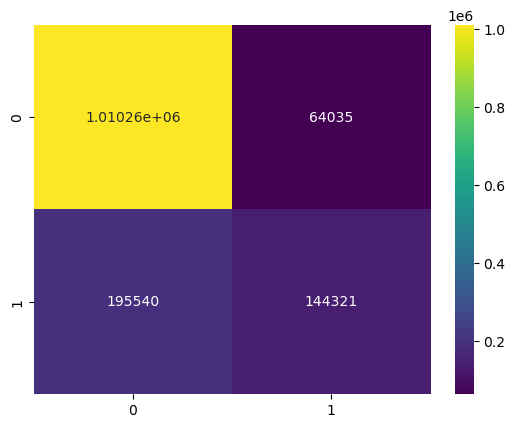

In [477]:
cm = confusion_matrix(y_train, y_pred_labels)
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g')

In [478]:
df_output = pd.DataFrame({"puntaje": y_pred_proba, "marca_default": y_train})
df_output.insert(0, "V1", range(1, len(df_output) + 1))

In [479]:
df_output_01_Train=df_output

In [480]:
df_output_01_Train.head(10)

,V1,puntaje,marca_default
0,1,0.112029,0
1,2,0.113158,0
2,3,0.203849,0
3,4,0.226405,0
4,5,0.001849,0
5,6,0.075975,0
6,7,0.628416,1
7,8,0.000732,0
8,9,0.002065,0
9,10,0.391505,0


In [481]:
df_output_01_Train.to_csv("C:/Users/damartinezp/OneDrive - BAN100 S.A/Documentos/Proyectos Borrador/PD_C1/2024_modelo/saved_model0/datos_salida_XG_01_9_TRAIN.csv")
df_output_01_Train.to_csv("C:/Users/damartinezp/OneDrive - BAN100 S.A/Documentos/Proyectos Borrador/PD_C1/2024_modelo/datos_salida_XG_01_9_TRAIN.csv")

In [482]:
print(df_output["marca_default"].value_counts())

marca_default
0    1074291
1     339861
Name: count, dtype: int64


In [483]:
deciles = np.percentile(y_pred_proba, [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
inferior=0
superior=1
deciles = np.append(inferior,deciles)
deciles[-1]=superior
# Asignar deciles a cada fila basado en el puntaje
df_output["decil"] = pd.cut(df_output["puntaje"], bins=deciles, labels=False, include_lowest=True)
# Crear una lista de los intervalos de los deciles
intervalos = []
for i in range(len(deciles) - 1):
    intervalos.append(f"{deciles[i]} - {deciles[i+1]}")

In [484]:
deciles_train_01=deciles
intervalos_train_01=intervalos

In [485]:
# Calcular el número de eventos y no eventos para cada intervalo de decil
eventos = []
no_eventos = []
intervalo=[]
for i in range(len(deciles) - 1):
    intervalo = df_output[(df_output['puntaje'] >= deciles[i]) & (df_output['puntaje'] < deciles[i+1])]
    eventos.append(intervalo["marca_default"].sum())
    no_eventos.append(len(intervalo) - intervalo["marca_default"].sum())
eventos.reverse()
no_eventos.reverse()
    
# Calcular el total de eventos y no eventos
total_eventos = df_output["marca_default"].sum()
total_no_eventos = len(df_output) - df_output["marca_default"].sum()
total_bin = [x + y for x, y in zip(eventos,no_eventos)]
data = {'Min': np.flip(deciles[0:len(deciles)-1]).tolist(),
        'Max': np.flip(deciles[1:len(deciles)]).tolist(),
        '0': no_eventos,
        '1': eventos,
        'total': total_bin}
df_resultado = pd.DataFrame(data)

In [486]:
df_resultado_01_train=df_resultado
print(df_resultado_01_train)

        Min       Max       0       1   total
0  0.588194  1.000000   33638  107796  141434
1  0.414337  0.588194   71517   69880  141397
2  0.305586  0.414337   92275   49142  141417
3  0.198159  0.305586  108007   33410  141417
4  0.125598  0.198159  120589   20906  141495
5  0.115702  0.125598  124448   17072  141520
6  0.105574  0.115702  126901   15155  142056
7  0.086602  0.105574  210235   20782  231017
8  0.075975  0.086602   48900    3912   52812
9  0.000000  0.075975  137781    1806  139587


### Observando el conjunto del test

In [487]:
X_test = test.drop(columns=["marca_default"])
y_test = test["marca_default"]
X_test=X_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)
dtest = xgb.DMatrix(X_test, label=y_test)

In [488]:
y_pred_proba_1 = model_1.predict(dtest)
y_pred_proba_2 = model_2.predict(dtest)
y_pred_proba_3 = model_3.predict(dtest)
y_pred_proba_4 = model_4.predict(dtest)
y_pred_proba_5 = model_5.predict(dtest)
y_pred_proba_6 = model_6.predict(dtest)
y_pred_proba_7 = model_7.predict(dtest)
y_pred_proba_8 = model_8.predict(dtest)
y_pred_proba_9 = model_9.predict(dtest)
y_pred_proba_10 = model_10.predict(dtest)

y_pred_proba=(y_pred_proba_1+y_pred_proba_2+y_pred_proba_3+y_pred_proba_4+y_pred_proba_5+y_pred_proba_6
             +y_pred_proba_7+y_pred_proba_8+y_pred_proba_9+y_pred_proba_10)/10

y_pred_labels = (y_pred_proba > proba).astype(int)    

In [489]:
len(y_pred_proba)

353539

In [490]:
cm=confusion_matrix(y_test, y_pred_labels)

acc, err, se, sp, prec, FPR =calMetrics(cm)
accuracy, precision, recall, f1, roc_auc=calMetrics2(y_test, y_pred_labels)
    
matrix={
    "Acc": acc,
    "Err": err,
    "Re": se,
    "Sp": sp,
    "Pre": prec,
    "FPR": FPR,
    "F1":f1,
    "ROC_AUC": roc_auc
}

In [491]:
matrix

{'Acc': 81.24,
 'Err': 18.76,
 'Re': 41.77,
 'Sp': 93.73,
 'Pre': 67.81,
 'FPR': 6.27,
 'F1': 51.7,
 'ROC_AUC': 67.75}

<AxesSubplot:>

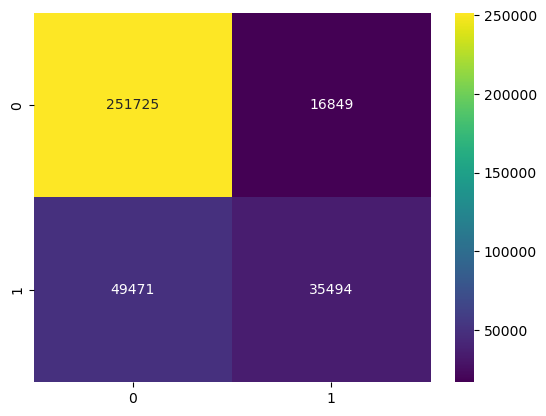

In [492]:
cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g')

In [493]:
df_output = pd.DataFrame({"puntaje": y_pred_proba, "marca_default": y_test})
df_output.insert(0, "V1", range(1, len(df_output) + 1))

In [494]:
df_output_01_Test=df_output

In [495]:
df_output_01_Test

,V1,puntaje,marca_default
0,1,0.487380,0
1,2,0.003463,0
2,3,0.432099,0
3,4,0.450601,1
4,5,0.412690,0
...,...,...,...
353534,353535,0.208187,0
353535,353536,0.352931,0
353536,353537,0.552563,1
353537,353538,0.096565,1


In [496]:
df_output_01_Test.to_csv("C:/Users/damartinezp/OneDrive - BAN100 S.A/Documentos/Proyectos Borrador/PD_C1/2024_modelo/saved_model0/datos_salida_XG_01_9_TEST.csv")
df_output_01_Test.to_csv("C:/Users/damartinezp/OneDrive - BAN100 S.A/Documentos/Proyectos Borrador/PD_C1/2024_modelo/datos_salida_XG_01_9_TEST.csv")

In [497]:
print(df_output["marca_default"].value_counts())

marca_default
0    268574
1     84965
Name: count, dtype: int64


In [498]:
deciles=deciles_train_01

In [499]:
# Asignar deciles a cada fila basado en el puntaje
df_output["decil"] = pd.cut(df_output["puntaje"], bins=deciles, labels=False, include_lowest=True)
# Crear una lista de los intervalos de los deciles
intervalos = []
for i in range(len(deciles) - 1):
    intervalos.append(f"{deciles[i]} - {deciles[i+1]}")

In [500]:
# Calcular el número de eventos y no eventos para cada intervalo de decil
eventos = []
no_eventos = []
intervalo=[]
for i in range(len(deciles) - 1):
    intervalo = df_output[(df_output['puntaje'] >= deciles[i]) & (df_output['puntaje'] < deciles[i+1])]
    eventos.append(intervalo["marca_default"].sum())
    no_eventos.append(len(intervalo) - intervalo["marca_default"].sum())
eventos.reverse()
no_eventos.reverse()
    
# Calcular el total de eventos y no eventos
total_eventos = df_output["marca_default"].sum()
total_no_eventos = len(df_output) - df_output["marca_default"].sum()
total_bin = [x + y for x, y in zip(eventos,no_eventos)]
data = {'Min': np.flip(deciles[0:len(deciles)-1]).tolist(),
        'Max': np.flip(deciles[1:len(deciles)]).tolist(),
        '0': no_eventos,
        '1': eventos,
        'total': total_bin}
df_resultado = pd.DataFrame(data)

In [501]:
df_resultado_01_test=df_resultado
print(df_resultado_01_test)

        Min       Max      0      1  total
0  0.588194  1.000000   9040  26479  35519
1  0.414337  0.588194  18078  17450  35528
2  0.305586  0.414337  22827  12512  35339
3  0.198159  0.305586  26516   8398  34914
4  0.125598  0.198159  29918   5440  35358
5  0.115702  0.125598  31066   4253  35319
6  0.105574  0.115702  31823   3753  35576
7  0.086602  0.105574  52833   5230  58063
8  0.075975  0.086602  12241   1005  13246
9  0.000000  0.075975  34232    445  34677


### Backtest modelo reentrenado Enero Junio 2023 a Septiembre 2023

#### Junio 2023

In [502]:
registros_completos = df_filt_Junio_2023.dropna()
registros_faltantes = df_filt_Junio_2023[df_filt_Junio_2023.isnull().any(axis=1)]
print("Cantidad de datos con registros faltantes en alguna de las variables:", len(registros_faltantes))
print("\n\n Cantidad de datos con registros completos:", len(registros_completos))

Cantidad de datos con registros faltantes en alguna de las variables: 0


 Cantidad de datos con registros completos: 147862


In [503]:
registros_faltantes

,IDENTIFICACION,NUMERO_TARJETA,fecha_corte,dias_sistema,CUPO,mora_1_a,mora_2_a,P_MP6,TP_pp,PR_1_D,PR_O_D,C_AuM,marca_default


In [504]:
#df_filt_Junio_2023['mora_1_a'].fillna(0, inplace=True)
#df_filt_Junio_2023['mora_2_a'].fillna(0, inplace=True)

In [505]:
registros_completos = df_filt_Junio_2023.dropna()
registros_faltantes = df_filt_Junio_2023[df_filt_Junio_2023.isnull().any(axis=1)]
print("Cantidad de datos con registros faltantes en alguna de las variables:", len(registros_faltantes))
print("\n\n Cantidad de datos con registros completos:", len(registros_completos))

Cantidad de datos con registros faltantes en alguna de las variables: 0


 Cantidad de datos con registros completos: 147862


In [506]:
df_Junio_2023=registros_completos

In [507]:
df_Junio_2023.describe().T

,count,mean,min,25%,50%,75%,max,std
IDENTIFICACION,147862.0,324681181.484573,174229.0,26534728.75,52278042.5,1006517360.25,2000005158.0,462226168.653595
fecha_corte,147862,2023-06-01 00:00:00,2023-06-01 00:00:00,2023-06-01 00:00:00,2023-06-01 00:00:00,2023-06-01 00:00:00,2023-06-01 00:00:00,NaN
dias_sistema,147862.0,18.821922,0.0,0.0,0.0,30.0,90.0,27.825371
CUPO,147862.0,2947265.159027,50000.0,1220000.0,2500000.0,4500000.0,6600000.0,1976804.397567
mora_1_a,147862.0,13.735158,0.0,0.0,0.0,22.0,119.0,24.0669
mora_2_a,147862.0,13.460084,0.0,0.0,0.0,16.0,150.0,26.140691
P_MP6,147862.0,0.619382,0.0,0.0,1.0,1.0,1.0,0.485541
TP_pp,147862.0,0.252492,0.0,0.0,0.0,1.0,1.0,0.434444
PR_1_D,147862.0,0.381139,0.0,0.0,0.0,1.0,1.0,0.485668
PR_O_D,147862.0,0.204535,0.0,0.0,0.0,0.0,1.0,0.403363


In [508]:
#df_Diciembre.rename(columns={'dias_sistema': 'DIAS_SISTEMA'}, inplace=True)
df1=df_Junio_2023[variables3]
#scaler = MinMaxScaler()
#scaler.fit(df1[cuantis])
df1.loc[:, cuantis] = df1[cuantis].astype(float)  
df1.loc[:, cuantis] = scaler_cargado.transform(df1[cuantis])  
for i in cualis:
    labelencoder = LabelEncoder()
    df1.loc[:, i] = labelencoder.fit_transform(df1[i])
X_test = df1.drop(columns=["marca_default"])
y_test = df1["marca_default"]
dtest = xgb.DMatrix(X_test, label=y_test)

C:\Users\damartinezp\AppData\Local\Temp\ipykernel_172\1067089380.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.         0.66666667 0.57777778 ... 0.12222222 0.12222222 0.33333333]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df1.loc[:, cuantis] = scaler_cargado.transform(df1[cuantis])


In [509]:
y_pred_proba_1 = model_1.predict(dtest)
y_pred_proba_2 = model_2.predict(dtest)
y_pred_proba_3 = model_3.predict(dtest)
y_pred_proba_4 = model_4.predict(dtest)
y_pred_proba_5 = model_5.predict(dtest)
y_pred_proba_6 = model_6.predict(dtest)
y_pred_proba_7 = model_7.predict(dtest)
y_pred_proba_8 = model_8.predict(dtest)
y_pred_proba_9 = model_9.predict(dtest)
y_pred_proba_10 = model_10.predict(dtest)

y_pred_proba=(y_pred_proba_1+y_pred_proba_2+y_pred_proba_3+y_pred_proba_4+y_pred_proba_5+y_pred_proba_6
             +y_pred_proba_7+y_pred_proba_8+y_pred_proba_9+y_pred_proba_10)/10

y_pred_labels = (y_pred_proba > proba).astype(int)  

cm=confusion_matrix(y_test, y_pred_labels)

acc, err, se, sp, prec, FPR =calMetrics(cm)
accuracy, precision, recall, f1, roc_auc=calMetrics2(y_test, y_pred_labels)
    
matrix={
    "Acc": acc,
    "Err": err,
    "Re": se,
    "Sp": sp,
    "Pre": prec,
    "FPR": FPR,
    "F1":f1,
    "ROC_AUC": roc_auc
}


In [510]:
matrix

{'Acc': 71.37,
 'Err': 28.63,
 'Re': 35.15,
 'Sp': 86.71,
 'Pre': 52.82,
 'FPR': 13.29,
 'F1': 42.21,
 'ROC_AUC': 60.93}

<AxesSubplot:>

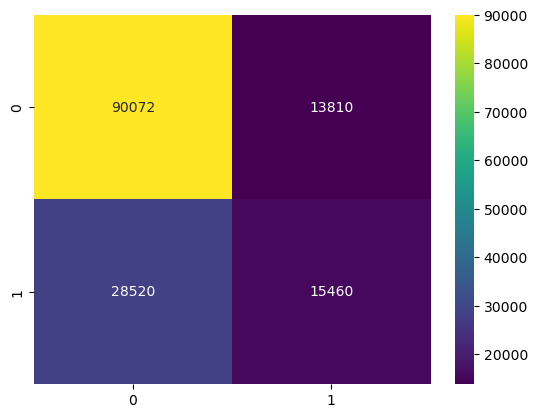

In [511]:
cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g')

In [512]:
df_output = pd.DataFrame({"puntaje": y_pred_proba, "marca_default": y_test})
df_output.insert(0, "V1", range(1, len(df_output) + 1))
df_output_01_Junio_2023=df_output

In [513]:
df_output_01_Junio_2023.to_csv("C:/Users/damartinezp/OneDrive - BAN100 S.A/Documentos/Proyectos Borrador/PD_C1/2024_modelo/saved_model0/datos_salida_XG_01_9_Junio_2023.csv")
df_output_01_Junio_2023.to_csv("C:/Users/damartinezp/OneDrive - BAN100 S.A/Documentos/Proyectos Borrador/PD_C1/2024_modelo/datos_salida_XG_01_9_Junio_2023.csv")

In [514]:
df_output_01_Junio_2023

,V1,puntaje,marca_default
0,1,0.000615,0
1,2,0.002208,0
2,3,0.420018,1
3,4,0.111126,0
4,5,0.338688,1
...,...,...,...
147857,147858,0.379913,0
147858,147859,0.707644,1
147859,147860,0.562298,0
147860,147861,0.605656,1


In [515]:
print(df_output["marca_default"].value_counts())

marca_default
0    103882
1     43980
Name: count, dtype: int64


In [516]:
deciles=deciles_train_01

In [517]:
# Asignar deciles a cada fila basado en el puntaje
df_output["decil"] = pd.cut(df_output["puntaje"], bins=deciles, labels=False, include_lowest=True)
# Crear una lista de los intervalos de los deciles
intervalos = []
for i in range(len(deciles) - 1):
    intervalos.append(f"{deciles[i]} - {deciles[i+1]}")

In [518]:
# Calcular el número de eventos y no eventos para cada intervalo de decil
eventos = []
no_eventos = []
for i in range(len(deciles) - 1):
    intervalo = df_output[(df_output['puntaje'] >= deciles[i]) & (df_output['puntaje'] < deciles[i+1])]
    eventos.append(intervalo["marca_default"].sum())
    no_eventos.append(len(intervalo) - intervalo["marca_default"].sum())
eventos.reverse()
no_eventos.reverse()
    
# Calcular el total de eventos y no eventos
total_eventos = df_output["marca_default"].sum()
total_no_eventos = len(df_output) - df_output["marca_default"].sum()
total_bin = [x + y for x, y in zip(eventos,no_eventos)]
data = {'Min': np.flip(deciles[0:len(deciles)-1]).tolist(),
        'Max': np.flip(deciles[1:len(deciles)]).tolist(),
        '0': no_eventos,
        '1': eventos,
        'total': total_bin}
df_resultado = pd.DataFrame(data)

In [519]:
df_resultado_01_Junio_2023=df_resultado
print(df_resultado_01_Junio_2023)

        Min       Max      0      1  total
0  0.588194  1.000000  10834   9417  20251
1  0.414337  0.588194   6533  13029  19562
2  0.305586  0.414337   8397   9440  17837
3  0.198159  0.305586   8844   5271  14115
4  0.125598  0.198159  11047   1936  12983
5  0.115702  0.125598  11352   1424  12776
6  0.105574  0.115702   8647   1158   9805
7  0.086602  0.105574  13608   1625  15233
8  0.075975  0.086602   6982    483   7465
9  0.000000  0.075975  17638    197  17835


#### Julio 2023

In [520]:
registros_completos = df_filt_Julio_2023.dropna()
registros_faltantes = df_filt_Julio_2023[df_filt_Julio_2023.isnull().any(axis=1)]
print("Cantidad de datos con registros faltantes en alguna de las variables:", len(registros_faltantes))
print("\n\n Cantidad de datos con registros completos:", len(registros_completos))

Cantidad de datos con registros faltantes en alguna de las variables: 0


 Cantidad de datos con registros completos: 139654


In [521]:
registros_faltantes

,IDENTIFICACION,NUMERO_TARJETA,fecha_corte,dias_sistema,CUPO,mora_1_a,mora_2_a,P_MP6,TP_pp,PR_1_D,PR_O_D,C_AuM,marca_default


In [522]:
#df_filt_Julio_2023['mora_1_a'].fillna(0, inplace=True)
#df_filt_Julio_2023['mora_2_a'].fillna(0, inplace=True)

In [523]:
registros_completos = df_filt_Julio_2023.dropna()
registros_faltantes = df_filt_Julio_2023[df_filt_Julio_2023.isnull().any(axis=1)]
print("Cantidad de datos con registros faltantes en alguna de las variables:", len(registros_faltantes))
print("\n\n Cantidad de datos con registros completos:", len(registros_completos))

Cantidad de datos con registros faltantes en alguna de las variables: 0


 Cantidad de datos con registros completos: 139654


In [524]:
df_Julio_2023=registros_completos

In [525]:
df_Julio_2023.describe().T

,count,mean,min,25%,50%,75%,max,std
IDENTIFICACION,139654.0,319582630.055237,174229.0,26428927.25,52121891.0,1005178353.5,2000005158.0,459768105.067405
fecha_corte,139654,2023-07-01 00:00:00,2023-07-01 00:00:00,2023-07-01 00:00:00,2023-07-01 00:00:00,2023-07-01 00:00:00,2023-07-01 00:00:00,NaN
dias_sistema,139654.0,19.031084,0.0,0.0,0.0,30.0,90.0,28.971627
CUPO,139654.0,2988126.733978,50000.0,1300000.0,2500000.0,4590000.0,6600000.0,1976580.582742
mora_1_a,139654.0,16.416959,0.0,0.0,0.0,27.0,119.0,25.746082
mora_2_a,139654.0,12.83593,0.0,0.0,0.0,12.0,150.0,24.660703
P_MP6,139654.0,0.589736,0.0,0.0,1.0,1.0,1.0,0.491883
TP_pp,139654.0,0.263766,0.0,0.0,0.0,1.0,1.0,0.440676
PR_1_D,139654.0,0.384278,0.0,0.0,0.0,1.0,1.0,0.486426
PR_O_D,139654.0,0.203832,0.0,0.0,0.0,0.0,1.0,0.402847


In [526]:
#df_Diciembre.rename(columns={'dias_sistema': 'DIAS_SISTEMA'}, inplace=True)
df1=df_Julio_2023[variables3]
df1.loc[:, cuantis] = df1[cuantis].astype(float)  
df1.loc[:, cuantis] = scaler_cargado.transform(df1[cuantis])  
for i in cualis:
    labelencoder = LabelEncoder()
    df1.loc[:, i] = labelencoder.fit_transform(df1[i])
X_test = df1.drop(columns=["marca_default"])
y_test = df1["marca_default"]
dtest = xgb.DMatrix(X_test, label=y_test)

C:\Users\damartinezp\AppData\Local\Temp\ipykernel_172\829024779.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.         0.66666667 0.         ... 0.31111111 0.13333333 0.33333333]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df1.loc[:, cuantis] = scaler_cargado.transform(df1[cuantis])


In [527]:
y_pred_proba_1 = model_1.predict(dtest)
y_pred_proba_2 = model_2.predict(dtest)
y_pred_proba_3 = model_3.predict(dtest)
y_pred_proba_4 = model_4.predict(dtest)
y_pred_proba_5 = model_5.predict(dtest)
y_pred_proba_6 = model_6.predict(dtest)
y_pred_proba_7 = model_7.predict(dtest)
y_pred_proba_8 = model_8.predict(dtest)
y_pred_proba_9 = model_9.predict(dtest)
y_pred_proba_10 = model_10.predict(dtest)

y_pred_proba=(y_pred_proba_1+y_pred_proba_2+y_pred_proba_3+y_pred_proba_4+y_pred_proba_5+y_pred_proba_6
             +y_pred_proba_7+y_pred_proba_8+y_pred_proba_9+y_pred_proba_10)/10

y_pred_labels = (y_pred_proba > proba).astype(int)  

cm=confusion_matrix(y_test, y_pred_labels)

acc, err, se, sp, prec, FPR =calMetrics(cm)
accuracy, precision, recall, f1, roc_auc=calMetrics2(y_test, y_pred_labels)
    
matrix={
    "Acc": acc,
    "Err": err,
    "Re": se,
    "Sp": sp,
    "Pre": prec,
    "FPR": FPR,
    "F1":f1,
    "ROC_AUC": roc_auc
}


In [528]:
matrix

{'Acc': 72.43,
 'Err': 27.57,
 'Re': 38.98,
 'Sp': 86.34,
 'Pre': 54.27,
 'FPR': 13.66,
 'F1': 45.37,
 'ROC_AUC': 62.66}

<AxesSubplot:>

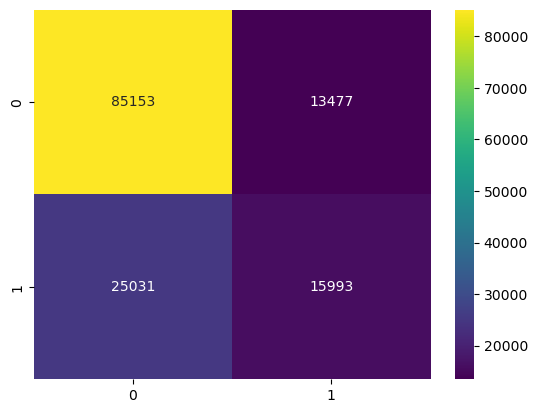

In [529]:
cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g')

In [530]:
df_output = pd.DataFrame({"puntaje": y_pred_proba, "marca_default": y_test})
df_output.insert(0, "V1", range(1, len(df_output) + 1))
df_output_01_Julio_2023=df_output

In [531]:
df_output_01_Julio_2023.to_csv("C:/Users/damartinezp/OneDrive - BAN100 S.A/Documentos/Proyectos Borrador/PD_C1/2024_modelo/saved_model0/datos_salida_XG_01_9_Julio_2023.csv")
df_output_01_Julio_2023.to_csv("C:/Users/damartinezp/OneDrive - BAN100 S.A/Documentos/Proyectos Borrador/PD_C1/2024_modelo/datos_salida_XG_01_9_Julio_2023.csv")

In [532]:
print(df_output["marca_default"].value_counts())

marca_default
0    98630
1    41024
Name: count, dtype: int64


In [533]:
deciles=deciles_train_01

In [534]:
# Asignar deciles a cada fila basado en el puntaje
df_output["decil"] = pd.cut(df_output["puntaje"], bins=deciles, labels=False, include_lowest=True)
# Crear una lista de los intervalos de los deciles
intervalos = []
for i in range(len(deciles) - 1):
    intervalos.append(f"{deciles[i]} - {deciles[i+1]}")

In [535]:
# Calcular el número de eventos y no eventos para cada intervalo de decil
eventos = []
no_eventos = []
for i in range(len(deciles) - 1):
    intervalo = df_output[(df_output['puntaje'] >= deciles[i]) & (df_output['puntaje'] < deciles[i+1])]
    eventos.append(intervalo["marca_default"].sum())
    no_eventos.append(len(intervalo) - intervalo["marca_default"].sum())
eventos.reverse()
no_eventos.reverse()
    
# Calcular el total de eventos y no eventos
total_eventos = df_output["marca_default"].sum()
total_no_eventos = len(df_output) - df_output["marca_default"].sum()
total_bin = [x + y for x, y in zip(eventos,no_eventos)]
data = {'Min': np.flip(deciles[0:len(deciles)-1]).tolist(),
        'Max': np.flip(deciles[1:len(deciles)]).tolist(),
        '0': no_eventos,
        '1': eventos,
        'total': total_bin}
df_resultado = pd.DataFrame(data)

In [536]:
df_resultado_01_Julio_2023=df_resultado
print(df_resultado_01_Julio_2023)

        Min       Max      0      1  total
0  0.588194  1.000000   9672  11451  21123
1  0.414337  0.588194   7414   9686  17100
2  0.305586  0.414337   7671   9192  16863
3  0.198159  0.305586   8108   4850  12958
4  0.125598  0.198159  10058   1865  11923
5  0.115702  0.125598  10600   1165  11765
6  0.105574  0.115702   8432    948   9380
7  0.086602  0.105574  12885   1303  14188
8  0.075975  0.086602   6460    389   6849
9  0.000000  0.075975  17330    175  17505


#### Agosto 2023

In [537]:
registros_completos = df_filt_Agosto_2023.dropna()
registros_faltantes = df_filt_Agosto_2023[df_filt_Agosto_2023.isnull().any(axis=1)]
print("Cantidad de datos con registros faltantes en alguna de las variables:", len(registros_faltantes))
print("\n\n Cantidad de datos con registros completos:", len(registros_completos))

Cantidad de datos con registros faltantes en alguna de las variables: 0


 Cantidad de datos con registros completos: 133181


In [538]:
registros_faltantes

,IDENTIFICACION,NUMERO_TARJETA,fecha_corte,dias_sistema,CUPO,mora_1_a,mora_2_a,P_MP6,TP_pp,PR_1_D,PR_O_D,C_AuM,marca_default


In [539]:
#df_filt_Agosto_2023['mora_1_a'].fillna(0, inplace=True)
#df_filt_Agosto_2023['mora_2_a'].fillna(0, inplace=True)

In [540]:
registros_completos = df_filt_Agosto_2023.dropna()
registros_faltantes = df_filt_Agosto_2023[df_filt_Agosto_2023.isnull().any(axis=1)]
print("Cantidad de datos con registros faltantes en alguna de las variables:", len(registros_faltantes))
print("\n\n Cantidad de datos con registros completos:", len(registros_completos))

Cantidad de datos con registros faltantes en alguna de las variables: 0


 Cantidad de datos con registros completos: 133181


In [541]:
df_Agosto_2023=registros_completos

In [542]:
df_Agosto_2023.describe().T

,count,mean,min,25%,50%,75%,max,std
IDENTIFICACION,133181.0,318067373.876551,174229.0,26354465.0,52089355.0,1004611373.0,2000005158.0,459035181.085206
fecha_corte,133181,2023-08-01 00:00:00,2023-08-01 00:00:00,2023-08-01 00:00:00,2023-08-01 00:00:00,2023-08-01 00:00:00,2023-08-01 00:00:00,NaN
dias_sistema,133181.0,18.911309,0.0,0.0,0.0,30.0,90.0,28.300308
CUPO,133181.0,3008215.302078,50000.0,1300000.0,2500000.0,4600000.0,6600000.0,1981980.926488
mora_1_a,133181.0,17.149774,0.0,0.0,0.0,28.0,120.0,28.356122
mora_2_a,133181.0,16.063417,0.0,0.0,0.0,21.0,149.0,27.647704
P_MP6,133181.0,0.605649,0.0,0.0,1.0,1.0,1.0,0.488713
TP_pp,133181.0,0.286242,0.0,0.0,0.0,1.0,1.0,0.452006
PR_1_D,133181.0,0.387781,0.0,0.0,0.0,1.0,1.0,0.487246
PR_O_D,133181.0,0.204451,0.0,0.0,0.0,0.0,1.0,0.403301


In [543]:
df1=df_Agosto_2023[variables3]
df1.loc[:, cuantis] = df1[cuantis].astype(float) 
df1.loc[:, cuantis] = scaler_cargado.transform(df1[cuantis])  
for i in cualis:
    labelencoder = LabelEncoder()
    df1.loc[:, i] = labelencoder.fit_transform(df1[i])
X_test = df1.drop(columns=["marca_default"])
y_test = df1["marca_default"]
dtest = xgb.DMatrix(X_test, label=y_test)

C:\Users\damartinezp\AppData\Local\Temp\ipykernel_172\2885264155.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.         0.66666667 0.         ... 0.65555556 0.         0.33333333]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df1.loc[:, cuantis] = scaler_cargado.transform(df1[cuantis])


In [544]:
y_pred_proba_1 = model_1.predict(dtest)
y_pred_proba_2 = model_2.predict(dtest)
y_pred_proba_3 = model_3.predict(dtest)
y_pred_proba_4 = model_4.predict(dtest)
y_pred_proba_5 = model_5.predict(dtest)
y_pred_proba_6 = model_6.predict(dtest)
y_pred_proba_7 = model_7.predict(dtest)
y_pred_proba_8 = model_8.predict(dtest)
y_pred_proba_9 = model_9.predict(dtest)
y_pred_proba_10 = model_10.predict(dtest)

y_pred_proba=(y_pred_proba_1+y_pred_proba_2+y_pred_proba_3+y_pred_proba_4+y_pred_proba_5+y_pred_proba_6
             +y_pred_proba_7+y_pred_proba_8+y_pred_proba_9+y_pred_proba_10)/10

y_pred_labels = (y_pred_proba > proba).astype(int)  

cm=confusion_matrix(y_test, y_pred_labels)

acc, err, se, sp, prec, FPR =calMetrics(cm)
accuracy, precision, recall, f1, roc_auc=calMetrics2(y_test, y_pred_labels)
    
matrix={
    "Acc": acc,
    "Err": err,
    "Re": se,
    "Sp": sp,
    "Pre": prec,
    "FPR": FPR,
    "F1":f1,
    "ROC_AUC": roc_auc
}


In [545]:
matrix

{'Acc': 71.42,
 'Err': 28.58,
 'Re': 25.99,
 'Sp': 87.93,
 'Pre': 43.89,
 'FPR': 12.07,
 'F1': 32.65,
 'ROC_AUC': 56.96}

<AxesSubplot:>

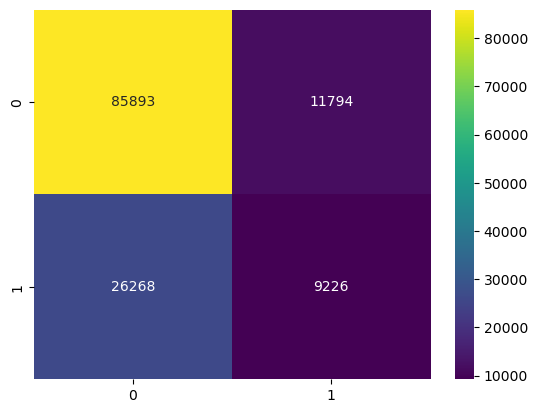

In [546]:
cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g')

In [547]:
df_output = pd.DataFrame({"puntaje": y_pred_proba, "marca_default": y_test})
df_output.insert(0, "V1", range(1, len(df_output) + 1))
df_output_01_Agosto_2023=df_output

In [548]:
df_output_01_Agosto_2023.to_csv("C:/Users/damartinezp/OneDrive - BAN100 S.A/Documentos/Proyectos Borrador/PD_C1/2024_modelo/saved_model0/datos_salida_XG_01_9_Agosto_2023.csv")

In [549]:
print(df_output["marca_default"].value_counts())

marca_default
0    97687
1    35494
Name: count, dtype: int64


In [550]:
deciles=deciles_train_01

In [551]:
# Asignar deciles a cada fila basado en el puntaje
df_output["decil"] = pd.cut(df_output["puntaje"], bins=deciles, labels=False, include_lowest=True)
# Crear una lista de los intervalos de los deciles
intervalos = []
for i in range(len(deciles) - 1):
    intervalos.append(f"{deciles[i]} - {deciles[i+1]}")

In [552]:
# Calcular el número de eventos y no eventos para cada intervalo de decil
eventos = []
no_eventos = []
for i in range(len(deciles) - 1):
    intervalo = df_output[(df_output['puntaje'] >= deciles[i]) & (df_output['puntaje'] < deciles[i+1])]
    eventos.append(intervalo["marca_default"].sum())
    no_eventos.append(len(intervalo) - intervalo["marca_default"].sum())
eventos.reverse()
no_eventos.reverse()
    
# Calcular el total de eventos y no eventos
total_eventos = df_output["marca_default"].sum()
total_no_eventos = len(df_output) - df_output["marca_default"].sum()
total_bin = [x + y for x, y in zip(eventos,no_eventos)]
data = {'Min': np.flip(deciles[0:len(deciles)-1]).tolist(),
        'Max': np.flip(deciles[1:len(deciles)]).tolist(),
        '0': no_eventos,
        '1': eventos,
        'total': total_bin}
df_resultado = pd.DataFrame(data)

In [553]:
df_resultado_01_Agosto_2023=df_resultado
print(df_resultado_01_Agosto_2023)

        Min       Max      0      1  total
0  0.588194  1.000000   8650   5677  14327
1  0.414337  0.588194   7121   8474  15595
2  0.305586  0.414337   9548  11151  20699
3  0.198159  0.305586   8844   5703  14547
4  0.125598  0.198159   9149   1493  10642
5  0.115702  0.125598   9597    847  10444
6  0.105574  0.115702   7858    751   8609
7  0.086602  0.105574  11838    985  12823
8  0.075975  0.086602   5747    278   6025
9  0.000000  0.075975  19335    135  19470


### Septiembre 2023

In [554]:
registros_completos = df_filt_Septiembre_2023.dropna()
registros_faltantes = df_filt_Septiembre_2023[df_filt_Septiembre_2023.isnull().any(axis=1)]
print("Cantidad de datos con registros faltantes en alguna de las variables:", len(registros_faltantes))
print("\n\n Cantidad de datos con registros completos:", len(registros_completos))

Cantidad de datos con registros faltantes en alguna de las variables: 0


 Cantidad de datos con registros completos: 114319


In [555]:
registros_faltantes

,IDENTIFICACION,NUMERO_TARJETA,fecha_corte,dias_sistema,CUPO,mora_1_a,mora_2_a,P_MP6,TP_pp,PR_1_D,PR_O_D,C_AuM,marca_default,mora_1_a_log,mora_2_a_log,dias_sitema_log,dias_sistema_log


In [556]:
#df_filt_Septiembre_2023['mora_1_a'].fillna(0, inplace=True)
#df_filt_Septiembre_2023['mora_2_a'].fillna(0, inplace=True)

In [557]:
registros_completos = df_filt_Septiembre_2023.dropna()
registros_faltantes = df_filt_Septiembre_2023[df_filt_Septiembre_2023.isnull().any(axis=1)]
print("Cantidad de datos con registros faltantes en alguna de las variables:", len(registros_faltantes))
print("\n\n Cantidad de datos con registros completos:", len(registros_completos))

Cantidad de datos con registros faltantes en alguna de las variables: 0


 Cantidad de datos con registros completos: 114319


In [558]:
df_Septiembre_2023=registros_completos

In [559]:
df_Septiembre_2023.describe().T

C:\Users\damartinezp\AppData\Roaming\Python\Python39\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\damartinezp\AppData\Roaming\Python\Python39\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\damartinezp\AppData\Roaming\Python\Python39\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\damartinezp\AppData\Roaming\Python\Python39\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,count,mean,min,25%,50%,75%,max,std
IDENTIFICACION,114319.0,314213901.974396,174229.0,25395364.0,51936150.0,1003155895.5,2000005158.0,457239971.143339
fecha_corte,114319,2023-09-01 00:00:00,2023-09-01 00:00:00,2023-09-01 00:00:00,2023-09-01 00:00:00,2023-09-01 00:00:00,2023-09-01 00:00:00,NaN
dias_sistema,114319.0,21.807075,0.0,0.0,0.0,42.0,90.0,29.351048
CUPO,114319.0,3038449.435186,50000.0,1300000.0,2555000.0,4800000.0,6600000.0,2003123.933875
mora_1_a,114319.0,17.753917,0.0,0.0,0.0,28.0,120.0,27.687081
mora_2_a,114319.0,18.425135,0.0,0.0,0.0,28.0,150.0,31.888188
P_MP6,114319.0,0.547188,0.0,0.0,1.0,1.0,1.0,0.49777
TP_pp,114319.0,0.333742,0.0,0.0,0.0,1.0,1.0,0.471551
PR_1_D,114319.0,0.427322,0.0,0.0,0.0,1.0,1.0,0.494692
PR_O_D,114319.0,0.132953,0.0,0.0,0.0,0.0,1.0,0.339525


In [560]:
df1=df_Septiembre_2023[variables3]
df1.loc[:, cuantis] = df1[cuantis].astype(float)  
df1.loc[:, cuantis] = scaler_cargado.transform(df1[cuantis])  
for i in cualis:
    labelencoder = LabelEncoder()
    df1.loc[:, i] = labelencoder.fit_transform(df1[i])
X_test = df1.drop(columns=["marca_default"])
y_test = df1["marca_default"]
dtest = xgb.DMatrix(X_test, label=y_test)

C:\Users\damartinezp\AppData\Local\Temp\ipykernel_172\1321990953.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.         0.66666667 0.23333333 ... 0.98888889 0.         0.33333333]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df1.loc[:, cuantis] = scaler_cargado.transform(df1[cuantis])


In [561]:
y_pred_proba_1 = model_1.predict(dtest)
y_pred_proba_2 = model_2.predict(dtest)
y_pred_proba_3 = model_3.predict(dtest)
y_pred_proba_4 = model_4.predict(dtest)
y_pred_proba_5 = model_5.predict(dtest)
y_pred_proba_6 = model_6.predict(dtest)
y_pred_proba_7 = model_7.predict(dtest)
y_pred_proba_8 = model_8.predict(dtest)
y_pred_proba_9 = model_9.predict(dtest)
y_pred_proba_10 = model_10.predict(dtest)

y_pred_proba=(y_pred_proba_1+y_pred_proba_2+y_pred_proba_3+y_pred_proba_4+y_pred_proba_5+y_pred_proba_6
             +y_pred_proba_7+y_pred_proba_8+y_pred_proba_9+y_pred_proba_10)/10

y_pred_labels = (y_pred_proba > proba).astype(int)  

In [562]:
y_pred_proba

array([6.1487401e-04, 2.2082001e-03, 6.6551507e-01, ..., 3.6745366e-01,
       4.8956910e-01, 2.3321682e-03], dtype=float32)

In [563]:
cm=confusion_matrix(y_test, y_pred_labels)

acc, err, se, sp, prec, FPR =calMetrics(cm)
accuracy, precision, recall, f1, roc_auc=calMetrics2(y_test, y_pred_labels)
    
matrix={
    "Acc": acc,
    "Err": err,
    "Re": se,
    "Sp": sp,
    "Pre": prec,
    "FPR": FPR,
    "F1":f1,
    "ROC_AUC": roc_auc
}

matrix

{'Acc': 75.5,
 'Err': 24.5,
 'Re': 30.63,
 'Sp': 89.78,
 'Pre': 48.82,
 'FPR': 10.22,
 'F1': 37.64,
 'ROC_AUC': 60.2}

<AxesSubplot:>

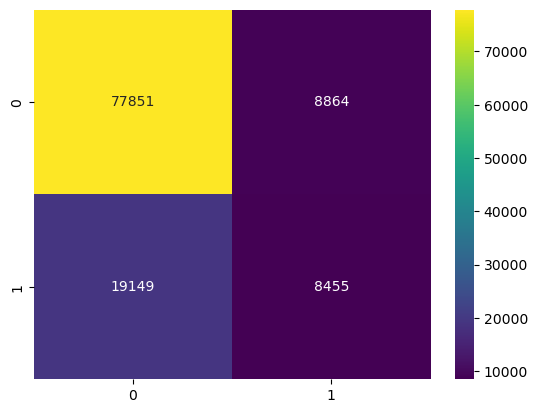

In [564]:
cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g')

In [565]:
df_output = pd.DataFrame({"puntaje": y_pred_proba, "marca_default": y_test})
df_output.insert(0, "V1", range(1, len(df_output) + 1))
df_output_01_Septiembre_2023=df_output

In [566]:
df_output_01_Septiembre_2023.to_csv("C:/Users/damartinezp/OneDrive - BAN100 S.A/Documentos/Proyectos Borrador/PD_C1/2024_modelo/saved_model0/datos_salida_XG_01_9_Septiembre_2023.csv")
df_output_01_Septiembre_2023.to_csv("C:/Users/damartinezp/OneDrive - BAN100 S.A/Documentos/Proyectos Borrador/PD_C1/2024_modelo/datos_salida_XG_01_9_Septiembre_2023.csv")

In [567]:
deciles=deciles_train_01

In [568]:
# Asignar deciles a cada fila basado en el puntaje
df_output["decil"] = pd.cut(df_output["puntaje"], bins=deciles, labels=False, include_lowest=True)
# Crear una lista de los intervalos de los deciles
intervalos = []
for i in range(len(deciles) - 1):
    intervalos.append(f"{deciles[i]} - {deciles[i+1]}")

In [569]:
# Calcular el número de eventos y no eventos para cada intervalo de decil
eventos = []
no_eventos = []
for i in range(len(deciles) - 1):
    intervalo = df_output[(df_output['puntaje'] >= deciles[i]) & (df_output['puntaje'] < deciles[i+1])]
    eventos.append(intervalo["marca_default"].sum())
    no_eventos.append(len(intervalo) - intervalo["marca_default"].sum())
eventos.reverse()
no_eventos.reverse()
    
# Calcular el total de eventos y no eventos
total_eventos = df_output["marca_default"].sum()
total_no_eventos = len(df_output) - df_output["marca_default"].sum()
total_bin = [x + y for x, y in zip(eventos,no_eventos)]
data = {'Min': np.flip(deciles[0:len(deciles)-1]).tolist(),
        'Max': np.flip(deciles[1:len(deciles)]).tolist(),
        '0': no_eventos,
        '1': eventos,
        'total': total_bin}
df_resultado = pd.DataFrame(data)

In [570]:
df_resultado_01_Septiembre_2023=df_resultado
print(df_resultado_01_Septiembre_2023)

        Min       Max      0     1  total
0  0.588194  1.000000   5937  4427  10364
1  0.414337  0.588194   6974  8680  15654
2  0.305586  0.414337  10515  8170  18685
3  0.198159  0.305586   9999  3262  13261
4  0.125598  0.198159   5488   845   6333
5  0.115702  0.125598   7160   501   7661
6  0.105574  0.115702   6824   624   7448
7  0.086602  0.105574  10410   790  11200
8  0.075975  0.086602   4991   205   5196
9  0.000000  0.075975  18417   100  18517


### Descriptiva

In [176]:
df_filt_Septiembre_2023

,IDENTIFICACION,NUMERO_TARJETA,fecha_corte,dias_sistema,CUPO,mora_1_a,mora_2_a,P_MP6,TP_pp,PR_1_D,PR_O_D,C_AuM,marca_default
0,174229,00000004010930006874794,2023-09-01,90,6600000.0,90.0,90.0,0,1,1,0,0,0
1,176459,00000004010930005632276,2023-09-01,60,5600000.0,60.0,60.0,0,1,0,0,0,0
2,179090,00000004010930006505158,2023-09-01,21,2700000.0,0.0,0.0,0,0,0,0,1,1
3,190685,00000004010930004539852,2023-09-01,90,1100000.0,90.0,90.0,0,1,0,0,0,0
4,192428,00000004010930006899866,2023-09-01,0,2770000.0,0.0,0.0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114314,2000003225,00000004010939000832344,2023-09-01,11,800000.0,0.0,0.0,0,0,0,1,0,1
114315,2000003235,00000004010939001184869,2023-09-01,42,400000.0,12.0,12.0,1,0,0,1,0,0
114316,2000003730,00000004010939000726215,2023-09-01,89,1110000.0,59.0,28.0,0,0,0,1,1,1
114317,2000004879,00000004010939000727668,2023-09-01,0,800000.0,0.0,12.0,0,0,0,1,0,1


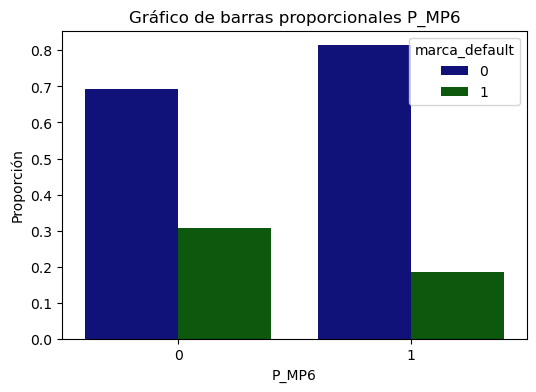

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener los conteos de cada combinación de categorías
counts = df_filt_Septiembre_2023.groupby(['P_MP6', 'marca_default']).size().reset_index(name='count')

# Calcular las frecuencias relativas
counts['proportion'] = counts.groupby('P_MP6')['count'].transform(lambda x: x / x.sum())

# Configurar el tamaño del gráfico
plt.figure(figsize=(6, 4))

# Crear el gráfico de barras proporcionales utilizando barplot de Seaborn
sns.barplot(data=counts, x='P_MP6', y='proportion',palette=['darkblue', 'darkgreen'], hue='marca_default')

# Personalizar el gráfico
plt.xlabel('P_MP6')
plt.ylabel('Proporción')
plt.title('Gráfico de barras proporcionales P_MP6')

# Mostrar el gráfico
plt.show()

In [182]:
counts

,P_MP6,marca_default,count,proportion
0,0,0,35805,0.691684
1,0,1,15960,0.308316
2,1,0,50910,0.813857
3,1,1,11644,0.186143


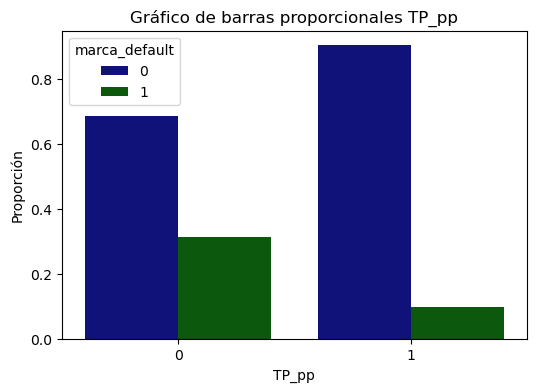

In [188]:
# Obtener los conteos de cada combinación de categorías
counts = df_filt_Septiembre_2023.groupby(['TP_pp', 'marca_default']).size().reset_index(name='count')

# Calcular las frecuencias relativas
counts['proportion'] = counts.groupby('TP_pp')['count'].transform(lambda x: x / x.sum())

# Configurar el tamaño del gráfico
plt.figure(figsize=(6, 4))

# Crear el gráfico de barras proporcionales utilizando barplot de Seaborn
sns.barplot(data=counts, x='TP_pp', y='proportion',palette=['darkblue', 'darkgreen'], hue='marca_default')

# Personalizar el gráfico
plt.xlabel('TP_pp')
plt.ylabel('Proporción')
plt.title('Gráfico de barras proporcionales TP_pp')

# Mostrar el gráfico
plt.show()

In [190]:
counts

,TP_pp,marca_default,count,proportion
0,0,0,52289,0.686514
1,0,1,23877,0.313486
2,1,0,34426,0.902314
3,1,1,3727,0.097686


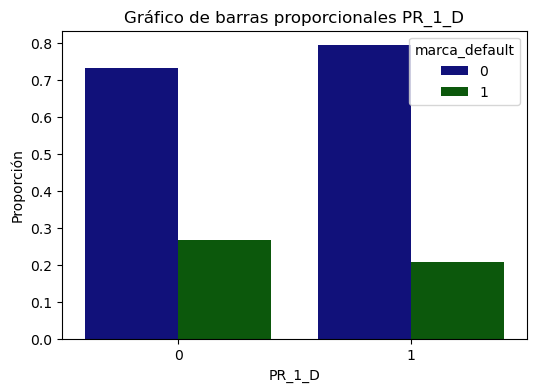

In [191]:
# Obtener los conteos de cada combinación de categorías
counts = df_filt_Septiembre_2023.groupby(['PR_1_D', 'marca_default']).size().reset_index(name='count')

# Calcular las frecuencias relativas
counts['proportion'] = counts.groupby('PR_1_D')['count'].transform(lambda x: x / x.sum())

# Configurar el tamaño del gráfico
plt.figure(figsize=(6, 4))

# Crear el gráfico de barras proporcionales utilizando barplot de Seaborn
sns.barplot(data=counts, x='PR_1_D', y='proportion',palette=['darkblue', 'darkgreen'], hue='marca_default')

# Personalizar el gráfico
plt.xlabel('PR_1_D')
plt.ylabel('Proporción')
plt.title('Gráfico de barras proporcionales PR_1_D')

# Mostrar el gráfico
plt.show()

In [192]:
counts

,PR_1_D,marca_default,count,proportion
0,0,0,47985,0.732954
1,0,1,17483,0.267046
2,1,0,38730,0.792819
3,1,1,10121,0.207181


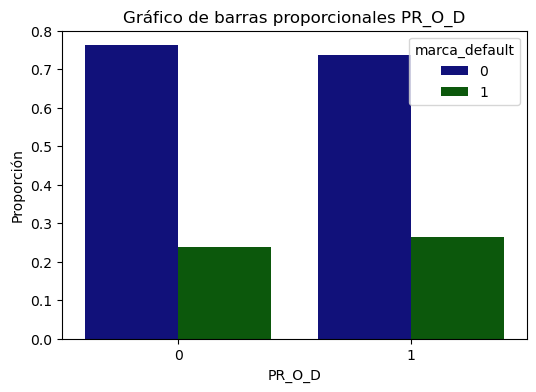

In [193]:
# Obtener los conteos de cada combinación de categorías
counts = df_filt_Septiembre_2023.groupby(['PR_O_D', 'marca_default']).size().reset_index(name='count')

# Calcular las frecuencias relativas
counts['proportion'] = counts.groupby('PR_O_D')['count'].transform(lambda x: x / x.sum())

# Configurar el tamaño del gráfico
plt.figure(figsize=(6, 4))

# Crear el gráfico de barras proporcionales utilizando barplot de Seaborn
sns.barplot(data=counts, x='PR_O_D', y='proportion',palette=['darkblue', 'darkgreen'], hue='marca_default')

# Personalizar el gráfico
plt.xlabel('PR_O_D')
plt.ylabel('Proporción')
plt.title('Gráfico de barras proporcionales PR_O_D')

# Mostrar el gráfico
plt.show()

In [194]:
counts

,PR_O_D,marca_default,count,proportion
0,0,0,75523,0.761935
1,0,1,23597,0.238065
2,1,0,11192,0.736364
3,1,1,4007,0.263636


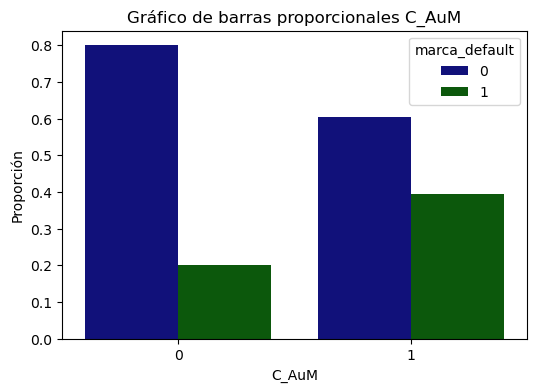

In [195]:
# Obtener los conteos de cada combinación de categorías
counts = df_filt_Septiembre_2023.groupby(['C_AuM', 'marca_default']).size().reset_index(name='count')

# Calcular las frecuencias relativas
counts['proportion'] = counts.groupby('C_AuM')['count'].transform(lambda x: x / x.sum())

# Configurar el tamaño del gráfico
plt.figure(figsize=(6, 4))

# Crear el gráfico de barras proporcionales utilizando barplot de Seaborn
sns.barplot(data=counts, x='C_AuM', y='proportion',palette=['darkblue', 'darkgreen'], hue='marca_default')

# Personalizar el gráfico
plt.xlabel('C_AuM')
plt.ylabel('Proporción')
plt.title('Gráfico de barras proporcionales C_AuM')

# Mostrar el gráfico
plt.show()

In [196]:
counts

,C_AuM,marca_default,count,proportion
0,0,0,72115,0.799776
1,0,1,18054,0.200224
2,1,0,14600,0.604555
3,1,1,9550,0.395445


In [204]:
df_filt_Septiembre_2023['mora_1_a_log']=np.log(df_filt_Septiembre_2023['mora_1_a'])
df_filt_Septiembre_2023['mora_2_a_log']=np.log(df_filt_Septiembre_2023['mora_2_a'])
df_filt_Septiembre_2023['dias_sistema_log']=np.log(df_filt_Septiembre_2023['dias_sistema'])

C:\Users\damartinezp\AppData\Roaming\Python\Python39\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='CUPO', ylabel='Count'>

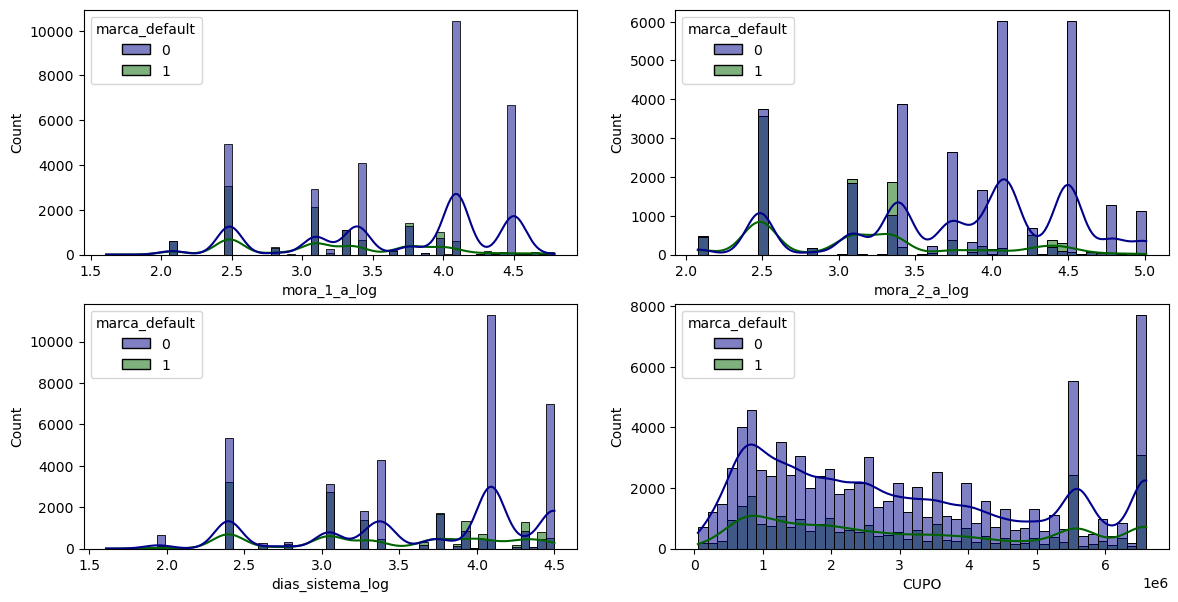

In [205]:
fig, axs = plt.subplots(2, 2, figsize=(14, 7))

sns.histplot(df_filt_Septiembre_2023, x='mora_1_a_log', hue='marca_default', kde=True, palette=['darkblue', 'darkgreen'], ax=axs[0, 0])
sns.histplot(df_filt_Septiembre_2023, x='mora_2_a_log', hue='marca_default', kde=True, palette=['darkblue', 'darkgreen'], ax=axs[0, 1])
sns.histplot(df_filt_Septiembre_2023, x='dias_sistema_log', hue='marca_default', kde=True, palette=['darkblue', 'darkgreen'], ax=axs[1, 0])
sns.histplot(df_filt_Septiembre_2023, x='CUPO', hue='marca_default', kde=True, palette=['darkblue', 'darkgreen'], ax=axs[1, 1])

In [210]:
df_filt_Septiembre_2023[cuantis].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
dias_sistema,114319.0,21.81,29.35,0.0,0.0,0.0,42.0,90.0
CUPO,114319.0,3038449.44,2003123.93,50000.0,1300000.0,2555000.0,4800000.0,6600000.0
mora_1_a,114319.0,17.75,27.69,0.0,0.0,0.0,28.0,120.0
mora_2_a,114319.0,18.43,31.89,0.0,0.0,0.0,28.0,150.0
